In [ ]:
from google.colab import files
uploaded = files.upload()

Saving IBM HR Data new.csv to IBM HR Data new.csv


In [ ]:
import sys
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.metrics import accuracy_score,classification_report
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,ExtraTreesClassifier
from sklearn.svm import SVC
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn import metrics
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [ ]:
#read the dataset
df = pd.read_csv('IBM HR Data new.csv')
df.head(5)
df.Attrition.value_counts()

<ipython-input-44-9f461fbd035e>:1: DtypeWarning: Columns (5,8,10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('IBM HR Data new.csv')


Current employee         19714
Voluntary Resignation     3709
Name: Attrition, dtype: int64

In [ ]:
#check for null values
df.isnull().sum()[df.isnull().sum()!=0]

Age                          3
Attrition                   13
BusinessTravel               8
DailyRate                   12
Department                  11
DistanceFromHome             9
Education                   12
EducationField               9
EmployeeCount                5
EmployeeNumber               1
Application ID               3
EnvironmentSatisfaction      9
Gender                      10
HourlyRate                   9
JobInvolvement               9
JobLevel                     7
JobRole                      9
JobSatisfaction              9
MaritalStatus               11
MonthlyIncome               13
MonthlyRate                 11
NumCompaniesWorked           9
Over18                      10
OverTime                    12
PercentSalaryHike           14
PerformanceRating           10
RelationshipSatisfaction     8
StandardHours               10
StockOptionLevel             9
TotalWorkingYears            8
TrainingTimesLastYear       11
WorkLifeBalance             10
YearsAtC

In [ ]:
Null_values_percentage=(df.isnull().sum().sum()/len(df))*100
Null_values_percentage


1.5019627922853729

In [ ]:
df=df.dropna() #Total 1.5% Null values are available In dataset.
#since null values only make up 1.5% of the dataset we drop them
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
Application ID              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCur

Visualise Outliers

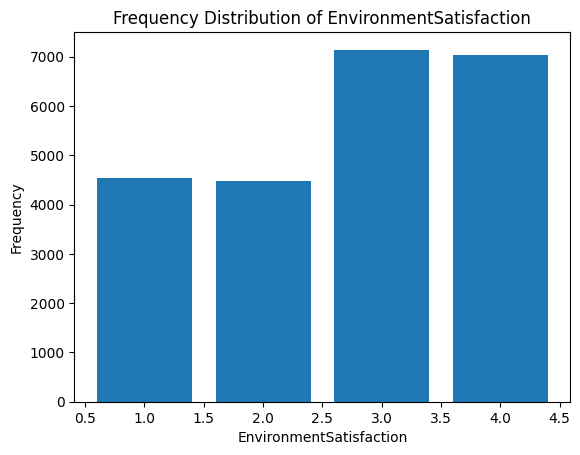

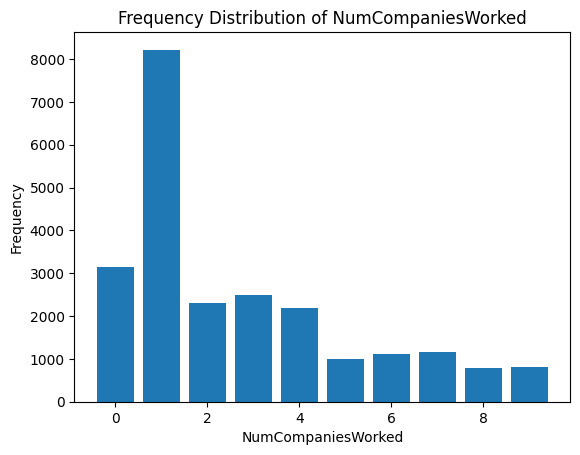

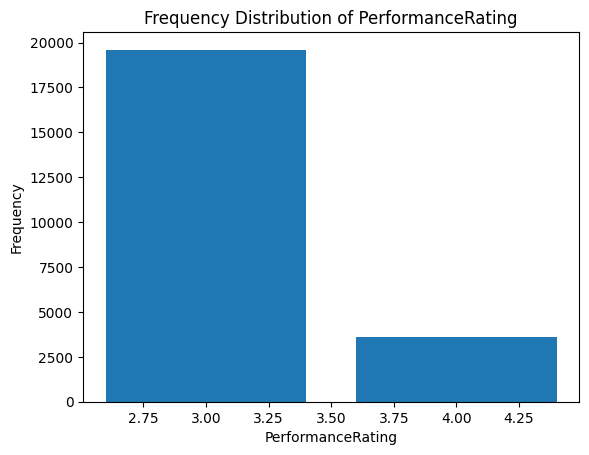

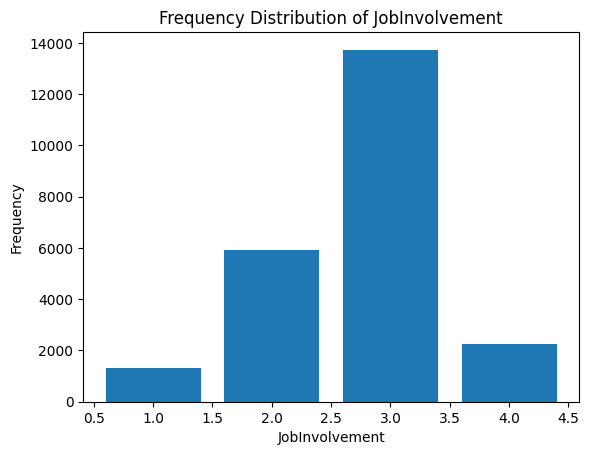

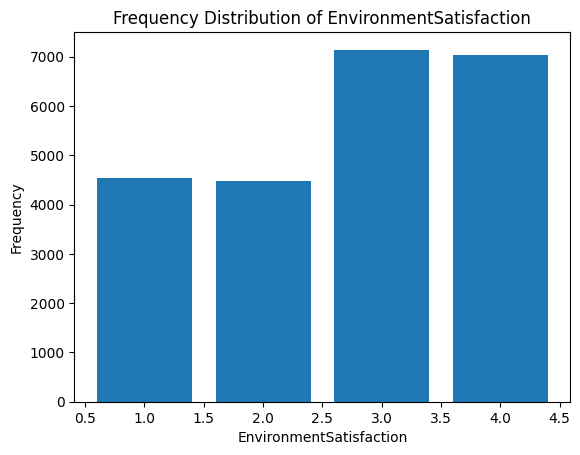

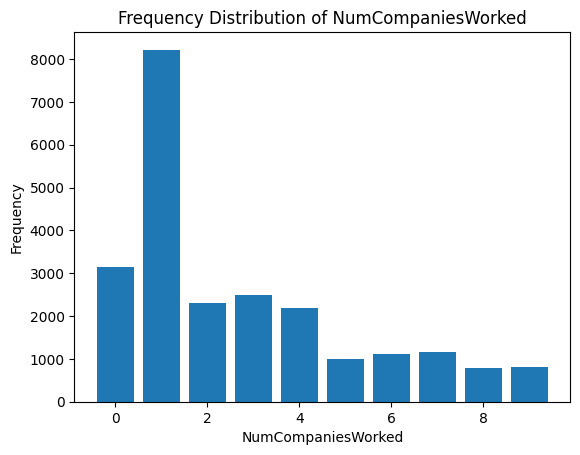

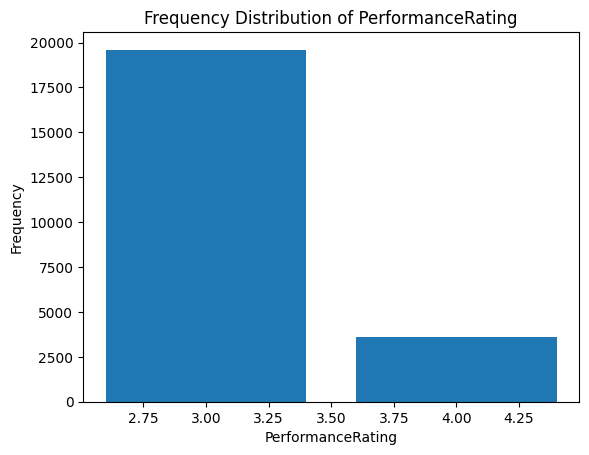

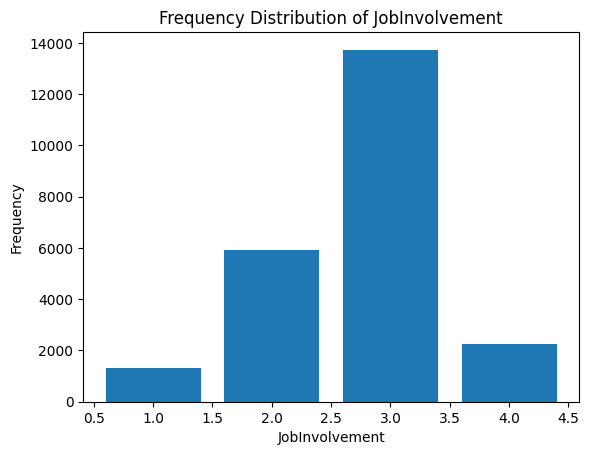

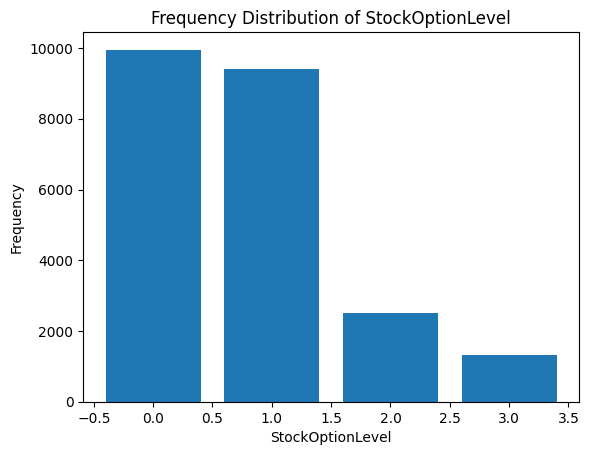

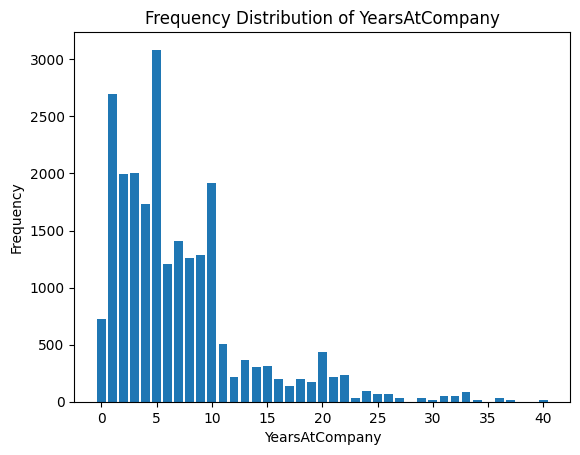

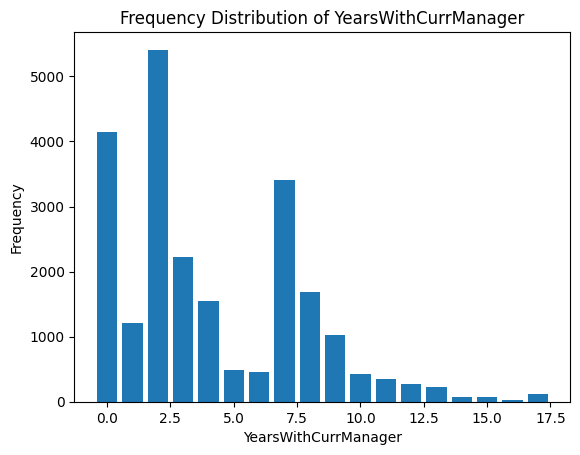

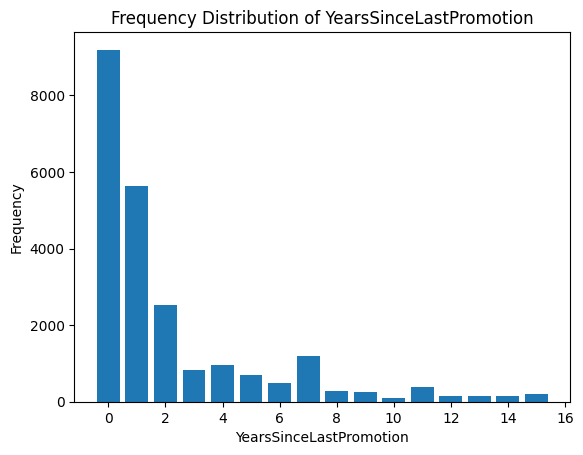

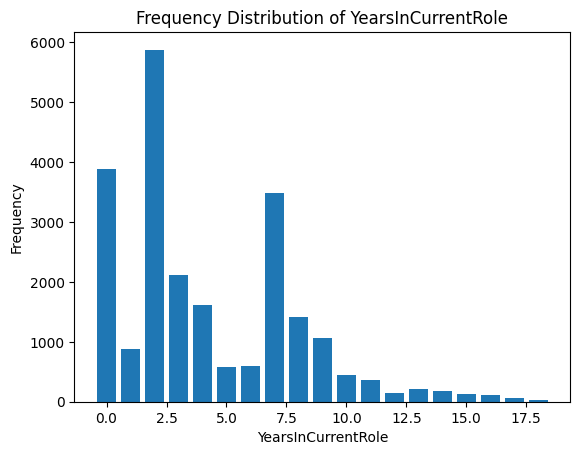

In [ ]:
# Calculate the frequency of each category
numerical_columns = ['EnvironmentSatisfaction','NumCompaniesWorked','PerformanceRating','JobInvolvement','EnvironmentSatisfaction','NumCompaniesWorked','PerformanceRating','JobInvolvement','StockOptionLevel','YearsAtCompany','YearsWithCurrManager','YearsSinceLastPromotion','YearsInCurrentRole']
for category in numerical_columns:
  frequency = df[category].value_counts()
  # Create a bar chart
  plt.bar(frequency.index, frequency.values)
  # Adding labels and title
  plt.xlabel(category)
  plt.ylabel('Frequency')
  plt.title('Frequency Distribution of '+ category)
  # Show the plot
  plt.show()

Capping outliers with 90% quantile

In [ ]:
# Function to replace outliers with the 0.9 quantile (capping)
def replace_outliers_with_quantile(series):
    quantile_90 = series.quantile(0.9)  # Calculate the 0.9 quantile
    for x in series:
      if x > quantile_90:
        x = quantile_90 # Replace outliers with the quantile value
    return series

# Get a list of numerical columns we wanna replace
# the following columns have uneven distribution as seen above so we replace the outliers with 90% quantile
numerical_columns = ['EnvironmentSatisfaction','NumCompaniesWorked','PerformanceRating','JobInvolvement','EnvironmentSatisfaction','NumCompaniesWorked','PerformanceRating','JobInvolvement','StockOptionLevel','YearsAtCompany','YearsWithCurrManager','YearsSinceLastPromotion','YearsInCurrentRole']
df1 = pd.DataFrame()
# Loop through numerical columns and replace outliers
for column in numerical_columns:
    df1[column] = replace_outliers_with_quantile(df[column])
    df[column] = df1[column]


View cleaned data with capped outliers

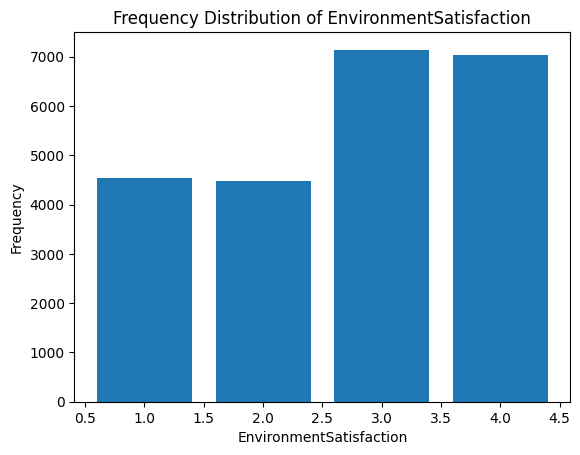

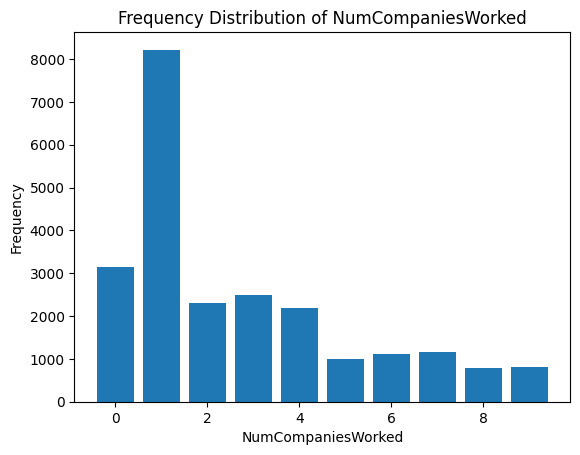

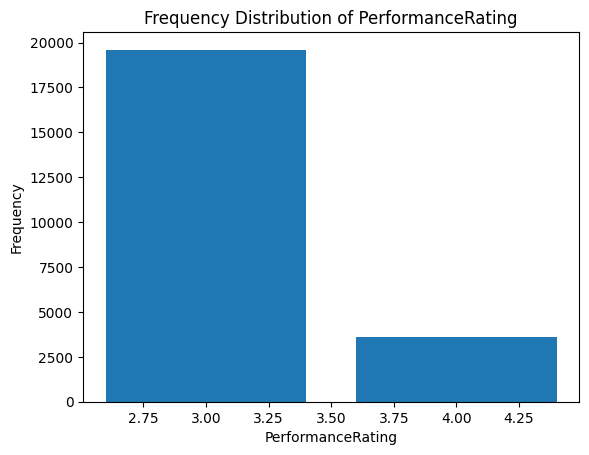

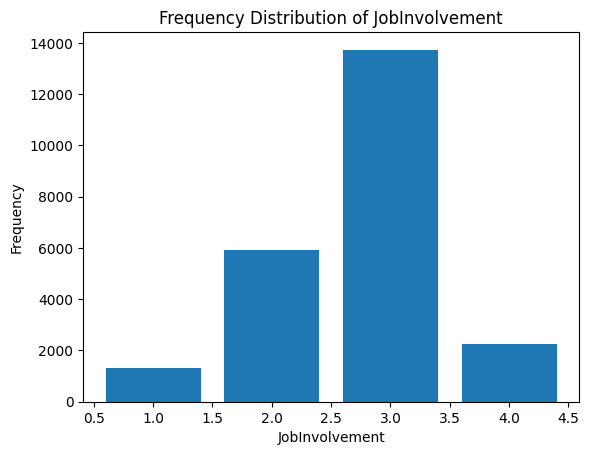

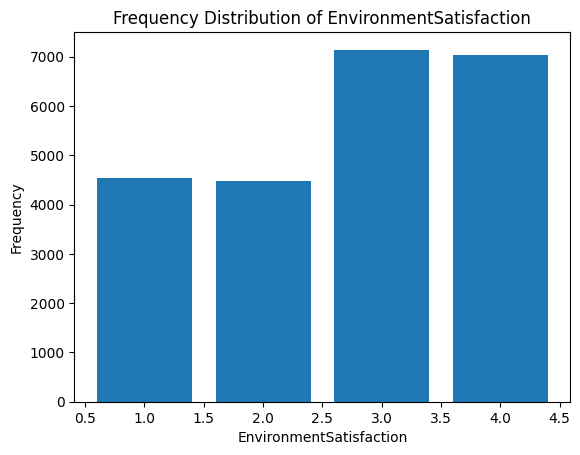

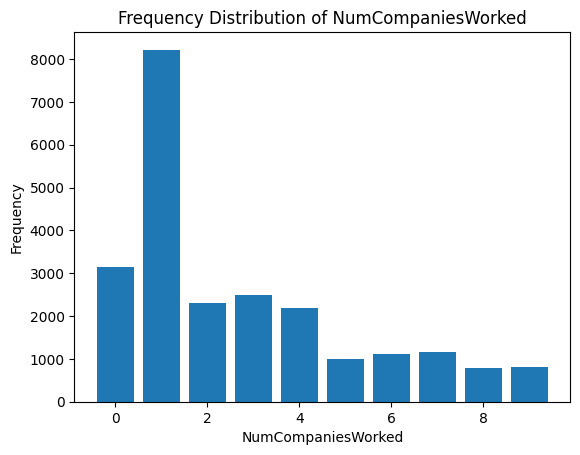

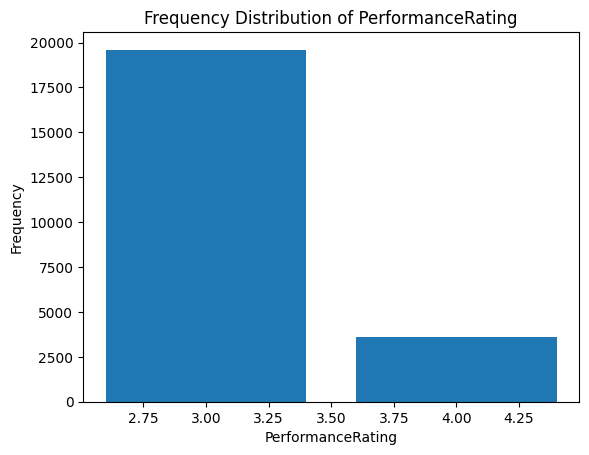

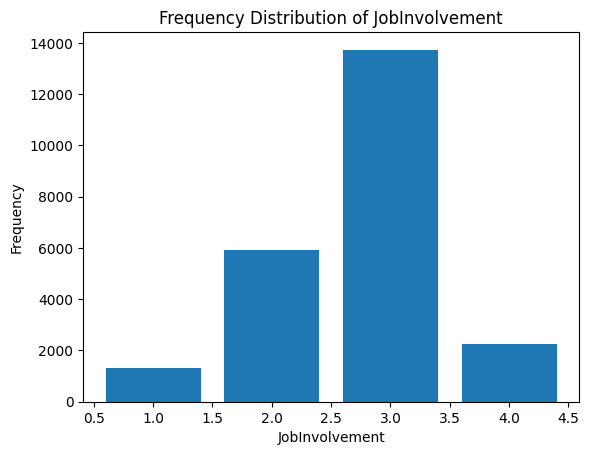

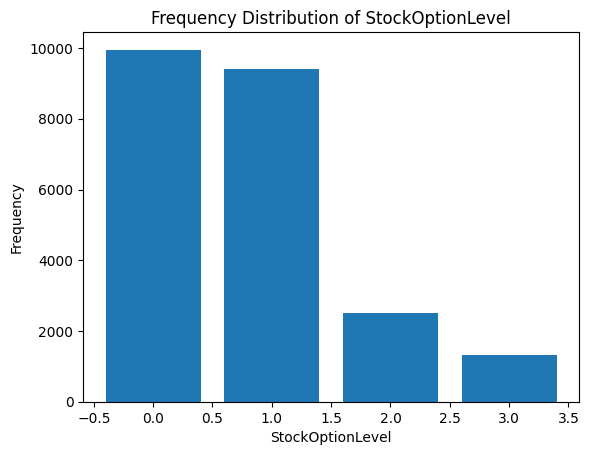

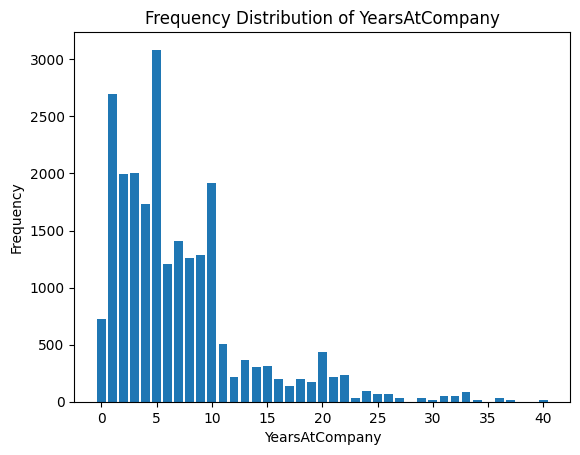

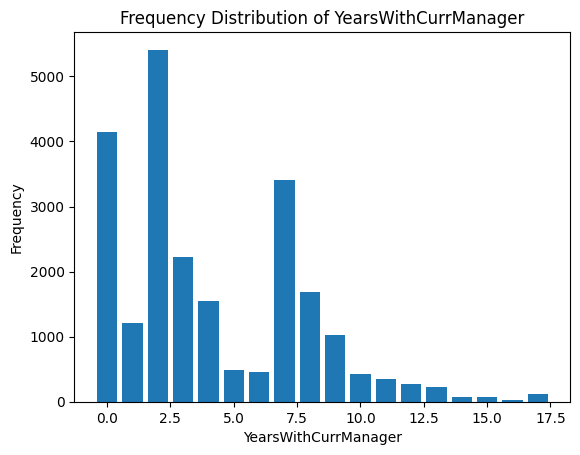

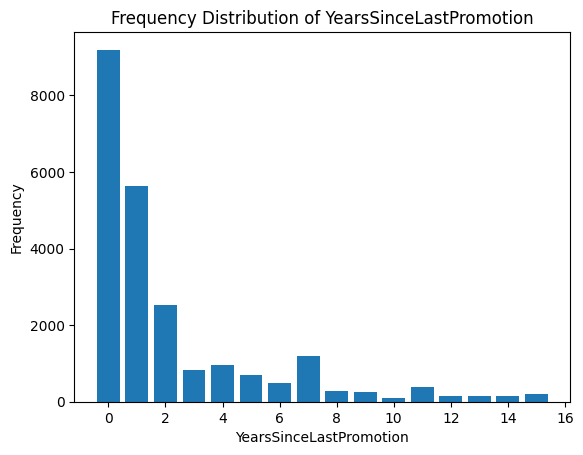

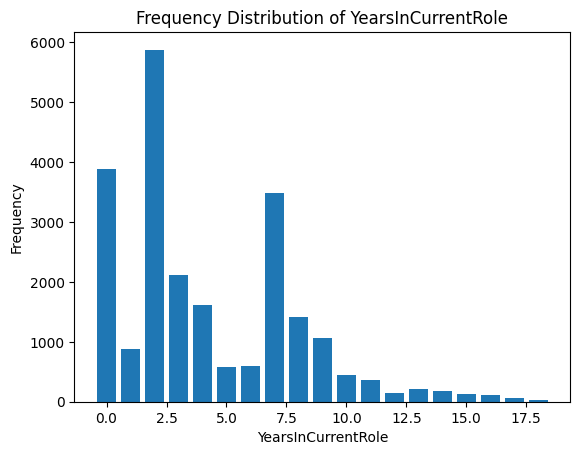

In [ ]:
# Calculate the frequency of each category
numerical_columns = ['EnvironmentSatisfaction','NumCompaniesWorked','PerformanceRating','JobInvolvement','EnvironmentSatisfaction','NumCompaniesWorked','PerformanceRating','JobInvolvement','StockOptionLevel','YearsAtCompany','YearsWithCurrManager','YearsSinceLastPromotion','YearsInCurrentRole']
for category in numerical_columns:
  frequency = df[category].value_counts()
  # Create a bar chart
  plt.bar(frequency.index, frequency.values)
  # Adding labels and title
  plt.xlabel(category)
  plt.ylabel('Frequency')
  plt.title('Frequency Distribution of '+ category)
  # Show the plot
  plt.show()

Remove Duplicates

In [ ]:
#remove the same application ID being repeated
has_duplicates = df['Application ID'].duplicated().any()
has_duplicates
df_no_duplicates = df.drop_duplicates(subset='Application ID')
df = df_no_duplicates

Correlation heat map


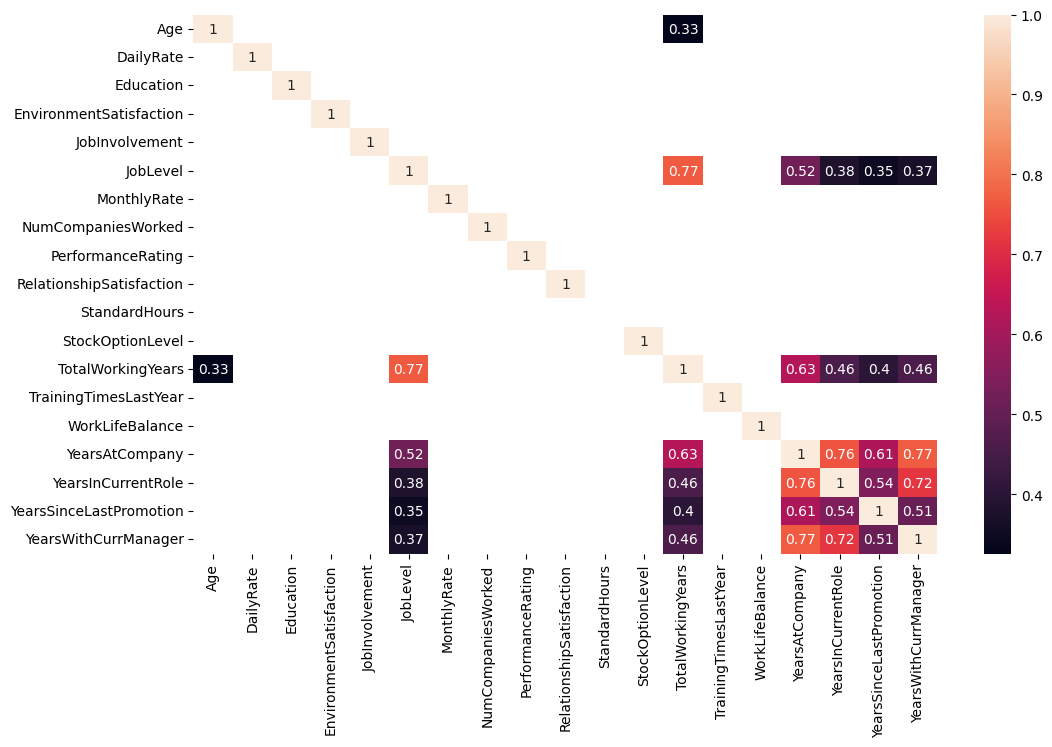

In [ ]:
numeric_ = df.select_dtypes(include=['int64', 'float64'])
# Compute the correlation matrix
corr = numeric_.corr()
# Create a heatmap
plt.subplots(figsize=[12, 7])
sns.heatmap(corr, annot=True, mask=corr < 0.3)
# Show the plot
plt.show()

<ipython-input-51-58e903884fdf>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


<Axes: >

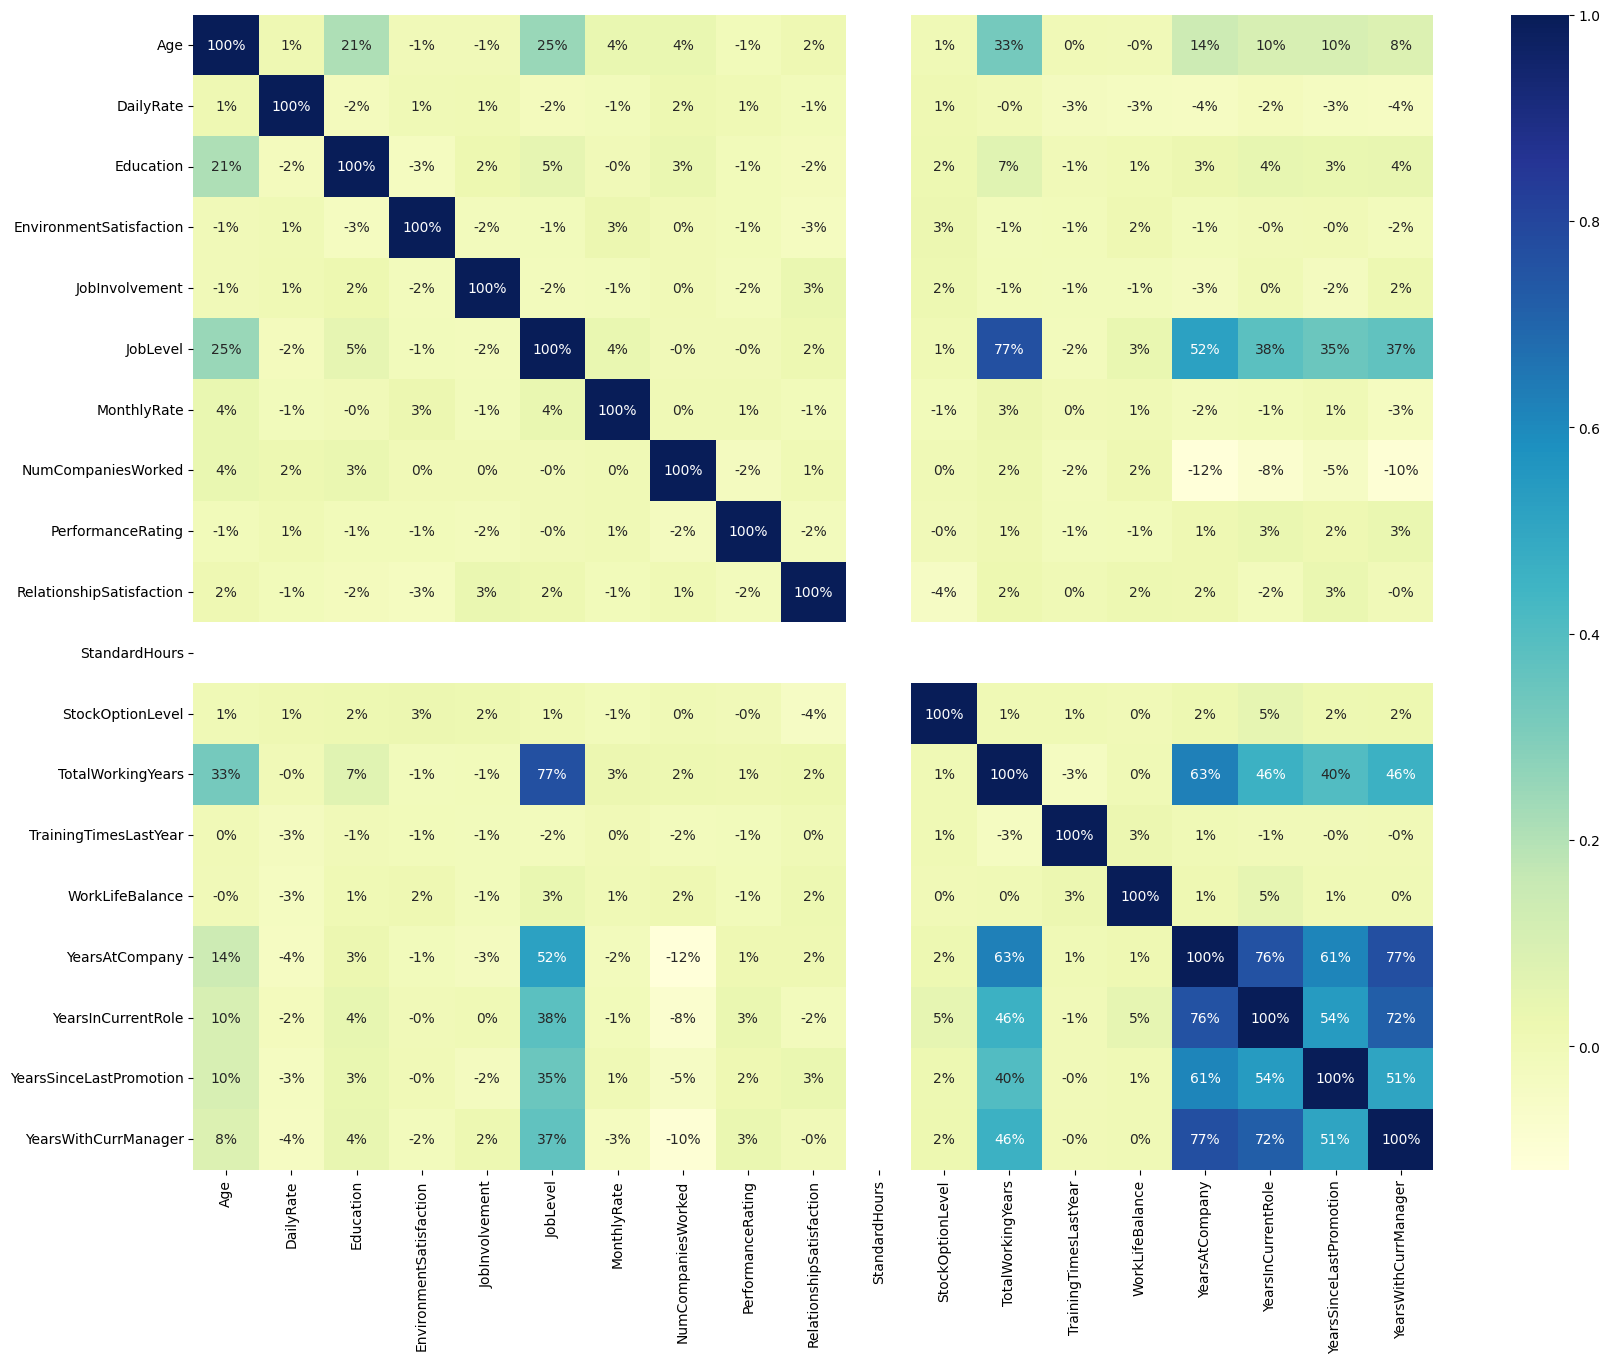

In [ ]:
corr=df.corr()
import  seaborn as sns
plt.figure(figsize=[20,15])
sns.heatmap(corr,annot=True,cmap='YlGnBu',fmt='.0%')

In [ ]:
df.describe()

,Age,DailyRate,Education,EnvironmentSatisfaction,JobInvolvement,JobLevel,MonthlyRate,NumCompaniesWorked,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,23190.000000,23190.000000,23190.000000,23190.000000,23190.000000,23190.000000,23190.000000,23190.000000,23190.000000,23190.000000,23190.0,23190.000000,23190.000000,23190.000000,23190.000000,23190.000000,23190.000000,23190.000000,23190.000000
mean,36.922941,802.246313,2.908754,2.719879,2.730574,2.065373,14302.076757,2.688702,3.155239,2.713497,80.0,0.794437,11.269211,2.798879,2.761665,7.016947,4.230530,2.182191,4.130487
std,9.116307,403.207375,1.024915,1.094924,0.710093,1.105947,7100.061799,2.498330,0.362140,1.080735,0.0,0.850685,7.765751,1.289952,0.705312,6.138112,3.626984,3.215755,3.571966
min,18.000000,102.000000,1.000000,1.000000,1.000000,1.000000,2094.000000,0.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,1.000000,8053.000000,1.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,3.000000,3.000000,3.000000,2.000000,14222.000000,2.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,4.000000,4.000000,3.000000,3.000000,20460.000000,4.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,5.000000,4.000000,4.000000,5.000000,26999.000000,9.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


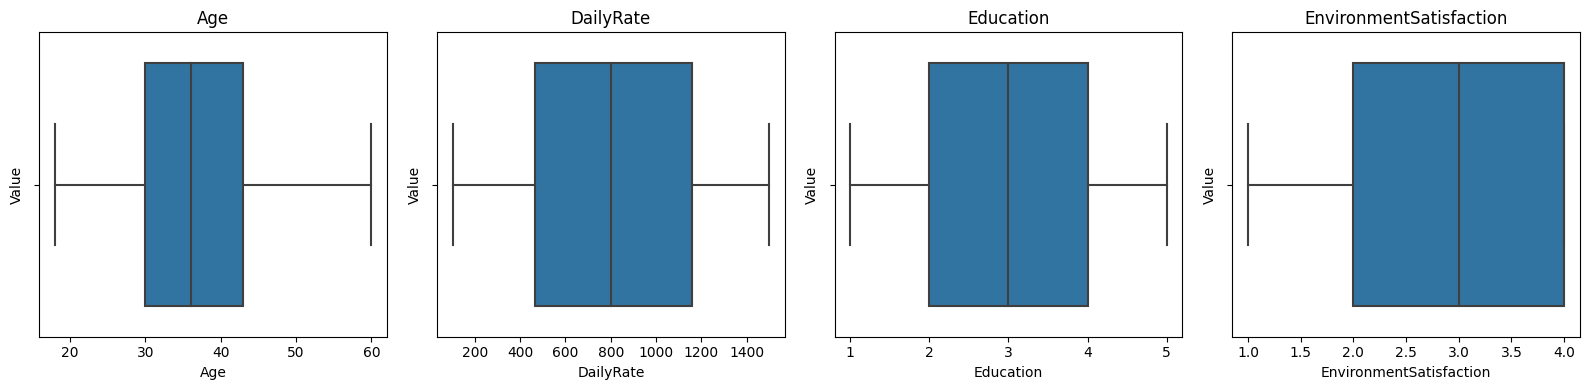

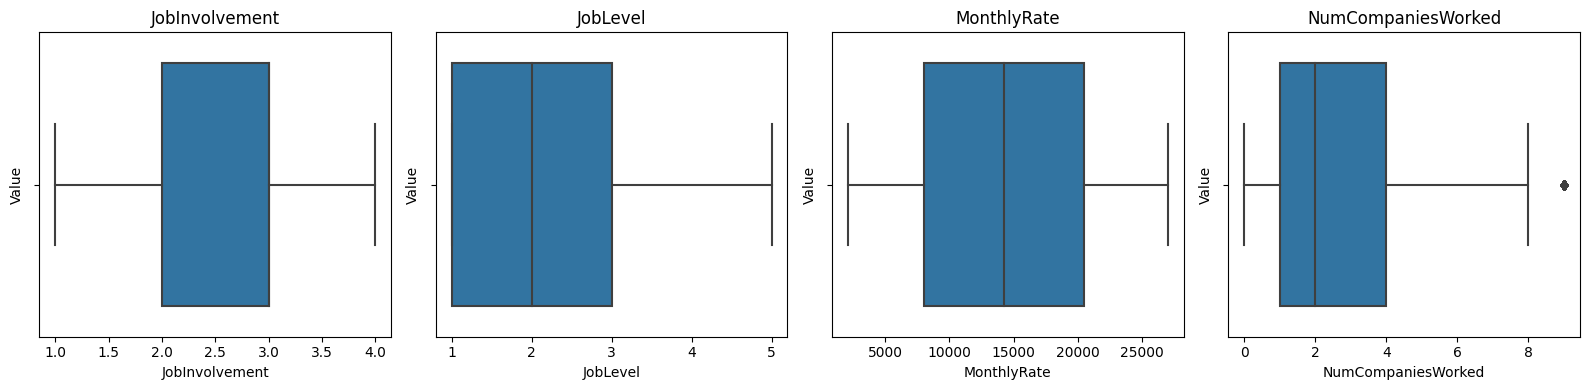

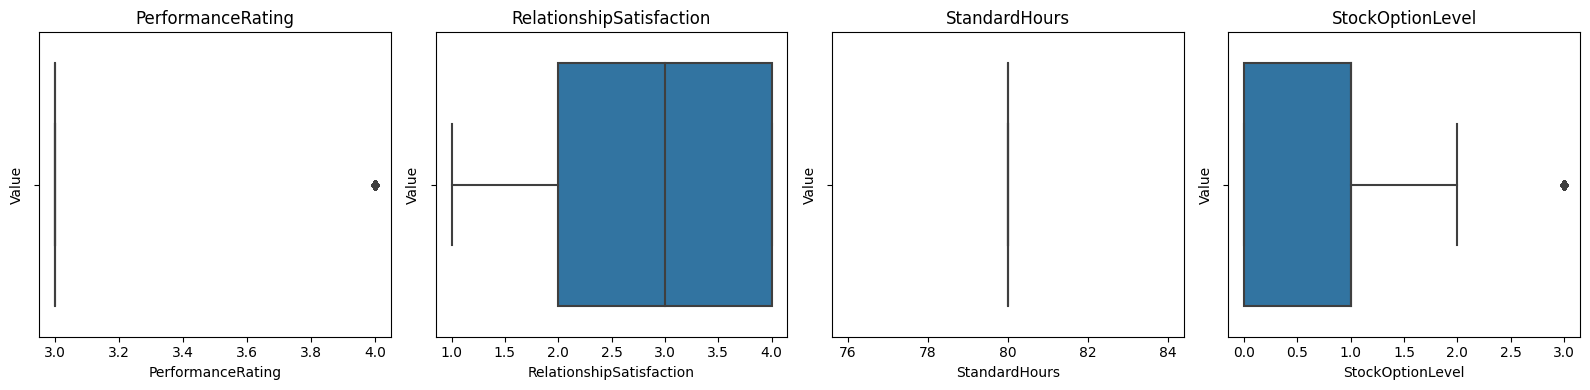

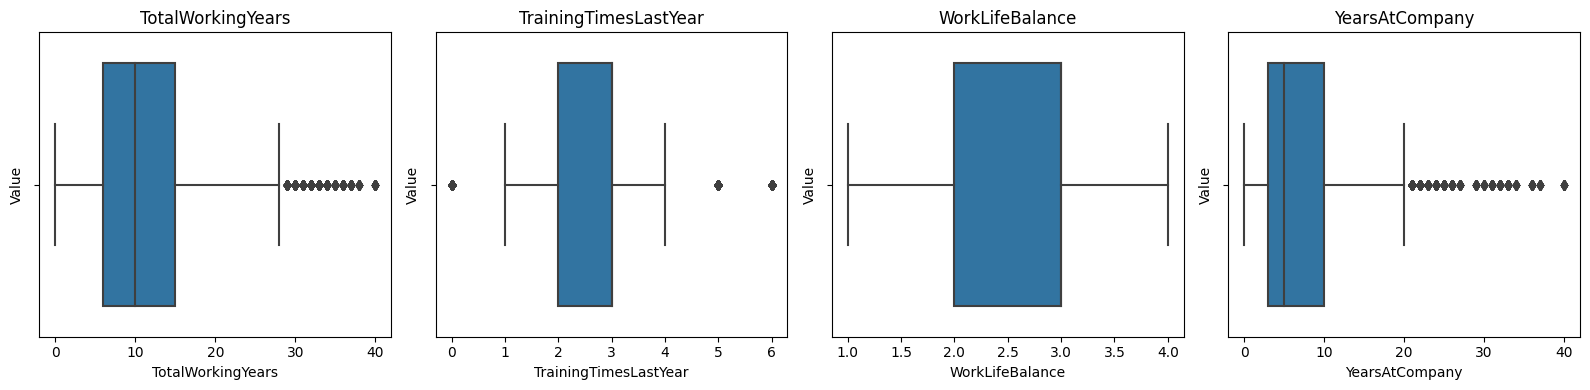

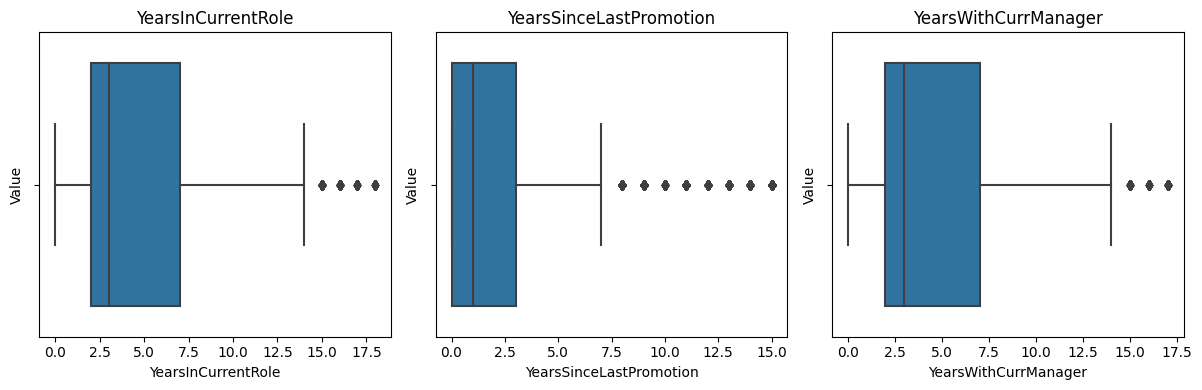

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

<Figure size 1600x400 with 0 Axes>

KeyboardInterrupt: ignored

In [ ]:
#box plot of numericals
numerical_vars = df.select_dtypes(include='number')

# Define the number of subplots per figure
subplots_per_figure = 4

# Calculate the number of figures needed
num_figures = (len(numerical_vars) - 1) // subplots_per_figure + 1
figure_size = (16, 4)  # Adjust the figure size as needed

for figure_number in range(num_figures):
    start_index = figure_number * subplots_per_figure
    end_index = min(start_index + subplots_per_figure, len(numerical_vars))

    # Create a new figure
    plt.figure(figsize=figure_size)

    for i, var in enumerate(numerical_vars.columns[start_index:end_index]):
        plt.subplot(1, subplots_per_figure, i + 1)
        sns.boxplot(x=numerical_vars[var])
        plt.title(var)
        plt.ylabel("Value")

    plt.tight_layout()
    plt.show()


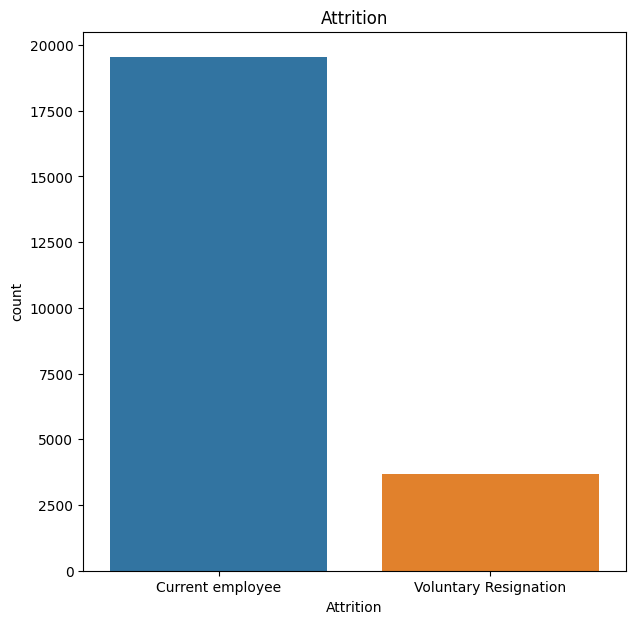

In [ ]:
df['Attrition'] = df['Attrition'].astype('category')
# Now, you can create the countplot
sns.countplot(data=df, x='Attrition')
plt.title('Attrition')
# Adjust the figure size if needed
fig = plt.gcf()
fig.set_size_inches(7, 7)
# Show the plot
plt.show()

## **Chi Square Test** for understanding the dependence between the independent and target variable. Here we can eliminate the insignificant variables for the further analysis

In [ ]:
from scipy.stats import chi2_contingency
target_column = 'Attrition'
chi_squared_results = pd.DataFrame(columns=['Variable', 'Chi-Square', 'p-value'])

for column in df.columns:
    if column != target_column and (df[column].dtype == 'object'or df[column].dtype == 'float64'):

        contingency_table = pd.crosstab(df[column], df[target_column])


        chi2, p, _, _ = chi2_contingency(contingency_table)


        chi_squared_results = chi_squared_results.append({'Variable': column, 'Chi-Square': chi2, 'p-value': p},
                                                         ignore_index=True)

significant_variables = chi_squared_results[chi_squared_results['p-value'] <= 0.05]
insignificant_variables = chi_squared_results[chi_squared_results['p-value'] >= 0.05]

print(chi_squared_results)
print("\nSignificant Variables:")
print(significant_variables)
print("\nInsignificant Variables:")
print(insignificant_variables)


<ipython-input-52-54ceb1cf1f76>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  chi_squared_results = chi_squared_results.append({'Variable': column, 'Chi-Square': chi2, 'p-value': p},
<ipython-input-52-54ceb1cf1f76>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  chi_squared_results = chi_squared_results.append({'Variable': column, 'Chi-Square': chi2, 'p-value': p},
<ipython-input-52-54ceb1cf1f76>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  chi_squared_results = chi_squared_results.append({'Variable': column, 'Chi-Square': chi2, 'p-value': p},
<ipython-input-52-54ceb1cf1f76>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  c

                    Variable    Chi-Square        p-value
0                        Age   1838.549340   0.000000e+00
1             BusinessTravel    390.240166   1.821481e-85
2                  DailyRate  13701.017523   0.000000e+00
3                 Department    175.078349   9.598860e-39
4           DistanceFromHome   1039.268396  1.872254e-180
5                  Education     47.012164   1.516045e-09
6             EducationField     96.653326   1.251149e-18
7              EmployeeCount    246.092072   1.846841e-55
8             EmployeeNumber  23144.513300   4.903955e-01
9             Application ID  23190.000000   4.969126e-01
10   EnvironmentSatisfaction     62.082965   2.109189e-13
11                    Gender      2.833654   9.230809e-02
12                HourlyRate    633.452770   1.121278e-91
13            JobInvolvement    112.269601   3.563322e-24
14                  JobLevel    265.636242   2.781876e-56
15                   JobRole    292.005007   2.069198e-58
16           J

<ipython-input-52-54ceb1cf1f76>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  chi_squared_results = chi_squared_results.append({'Variable': column, 'Chi-Square': chi2, 'p-value': p},
<ipython-input-52-54ceb1cf1f76>:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  chi_squared_results = chi_squared_results.append({'Variable': column, 'Chi-Square': chi2, 'p-value': p},


Removing insignificant variables

In [ ]:
# remove irrelevant columns as all emplyees are over 18, Standard Hours is 80 for everyone and Employee count is 1 for everyone and Employee number does not affect attrition
df=df.drop(['Over18','EmployeeNumber','StandardHours','EmployeeCount','Application ID','Gender','PerformanceRating','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager'],axis=1)

# **Travel Type vs Attrition**

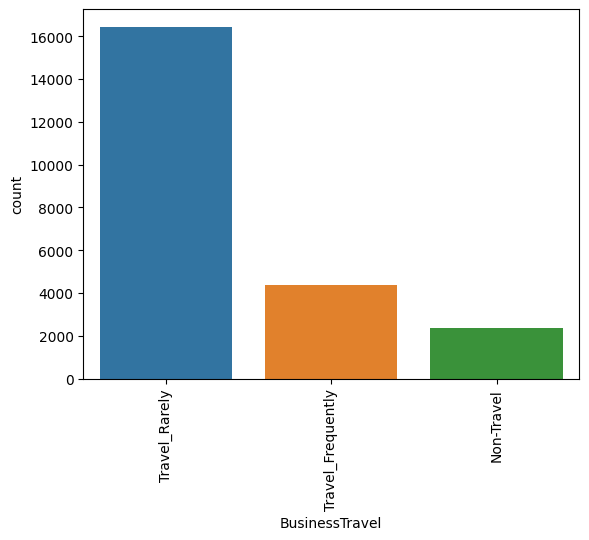

In [ ]:
sns.countplot(data=df, x='BusinessTravel')
plt.xticks(rotation=90)
#Show the plot
plt.show()

<Axes: xlabel='BusinessTravel', ylabel='Attrition'>

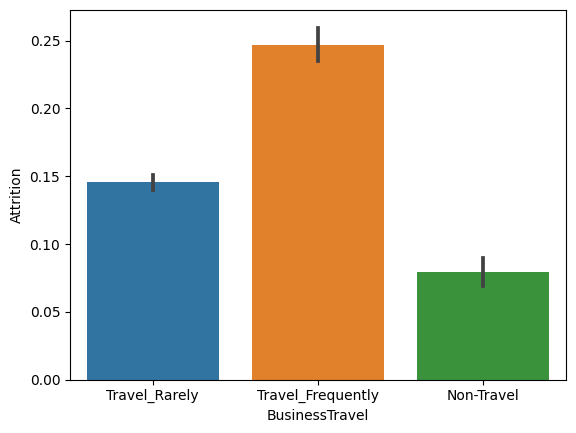

In [ ]:
df['Attrition'] = df['Attrition'].astype('category')
df['Attrition'] = df['Attrition'].cat.codes
sns.barplot(x='BusinessTravel', y='Attrition', data=df)

# **Department vs Attrition**

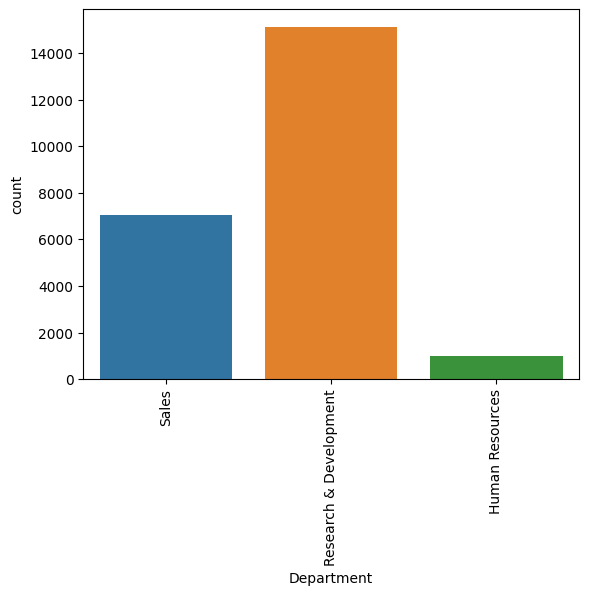

In [ ]:
sns.countplot(data=df, x='Department')
plt.xticks(rotation=90)
#Show the plot
plt.show()

<Axes: xlabel='Department', ylabel='Attrition'>

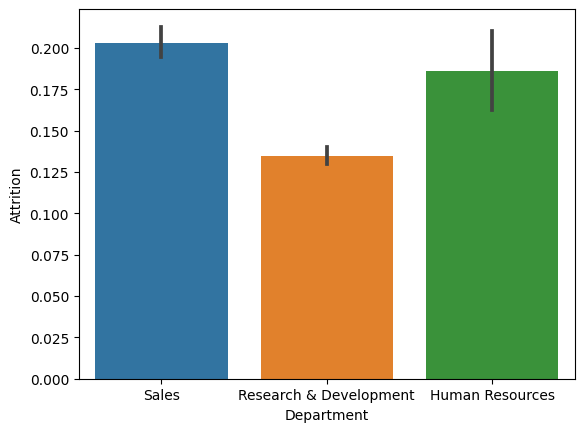

In [ ]:
df['Attrition'] = df['Attrition'].astype('category')
df['Attrition'] = df['Attrition'].cat.codes
sns.barplot(x='Department', y='Attrition', data=df)

# **Distance vs Attrition**

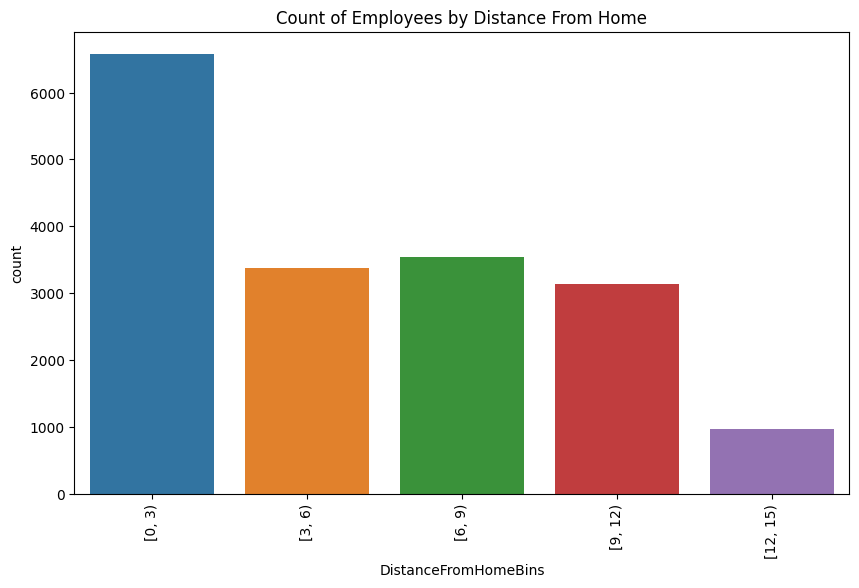

In [ ]:
#convert distance from home to numeric
df.DistanceFromHome = pd.to_numeric(df.DistanceFromHome,errors='coerce')
bins = range(0, 16, 3)
df['DistanceFromHomeBins']=pd.cut(df['DistanceFromHome'], bins=bins, right=False)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='DistanceFromHomeBins')
plt.xticks(rotation=90)
plt.title('Count of Employees by Distance From Home')
plt.show()


<Axes: xlabel='DistanceFromHomeBins', ylabel='Attrition'>

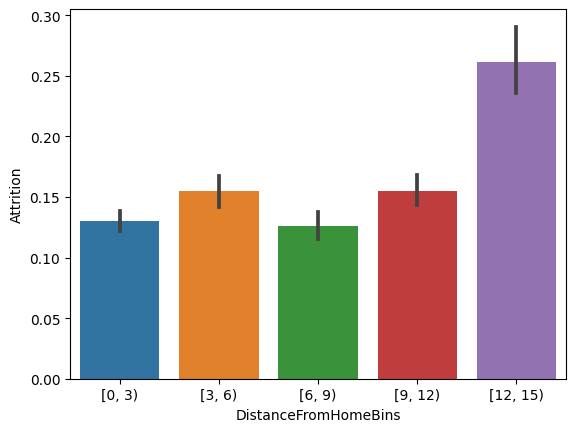

In [ ]:
df['Attrition'] = df['Attrition'].astype('category')
df['Attrition'] = df['Attrition'].cat.codes
sns.barplot(x='DistanceFromHomeBins', y='Attrition', data=df)

# **Environment Satisfaction vs Attrition**

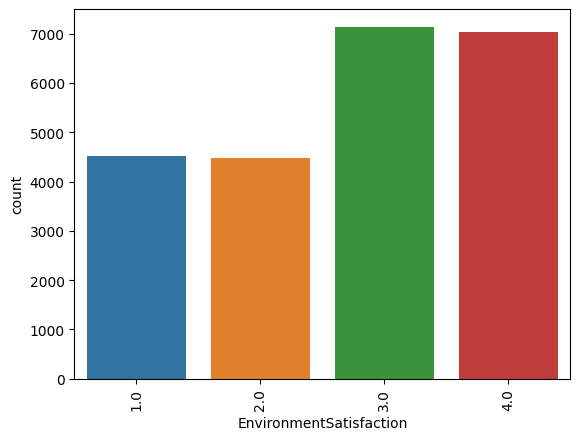

In [ ]:
sns.countplot(data=df, x='EnvironmentSatisfaction')
plt.xticks(rotation=90)
#Show the plot
plt.show()

<Axes: xlabel='EnvironmentSatisfaction', ylabel='Attrition'>

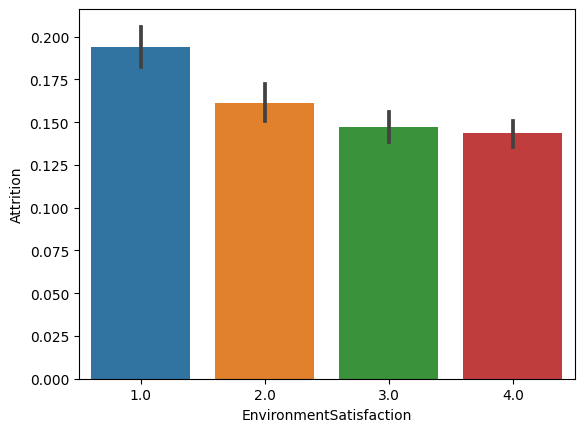

In [ ]:
df['Attrition'] = df['Attrition'].astype('category')
df['Attrition'] = df['Attrition'].cat.codes
sns.barplot(x='EnvironmentSatisfaction', y='Attrition', data=df)

# **Job role vs Attrition**

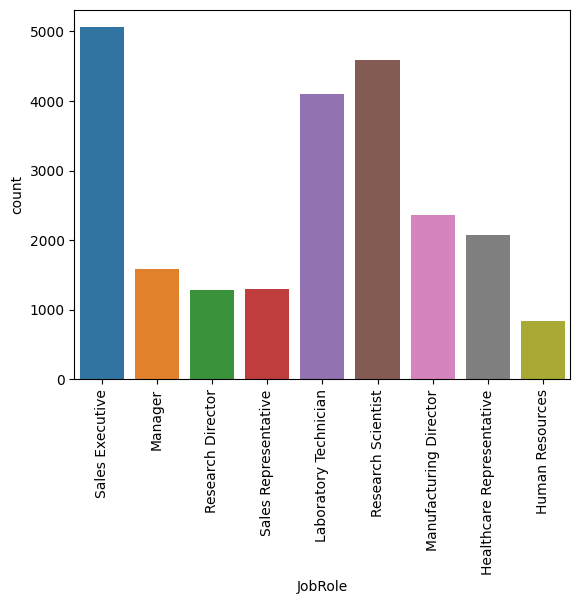

In [ ]:
sns.countplot(data=df, x='JobRole')
plt.xticks(rotation=90)
plt.show()

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'Sales Executive'),
  Text(1, 0, 'Manager'),
  Text(2, 0, 'Research Director'),
  Text(3, 0, 'Sales Representative'),
  Text(4, 0, 'Laboratory Technician'),
  Text(5, 0, 'Research Scientist'),
  Text(6, 0, 'Manufacturing Director'),
  Text(7, 0, 'Healthcare Representative'),
  Text(8, 0, 'Human Resources')])

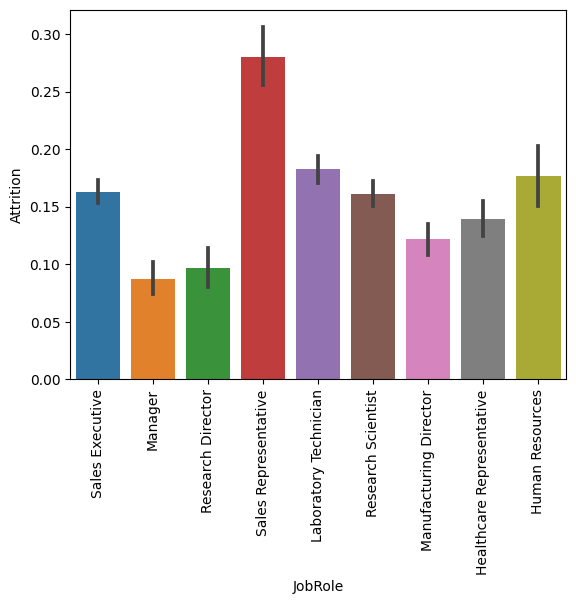

In [ ]:
df['Attrition'] = df['Attrition'].astype('category')
df['Attrition'] = df['Attrition'].cat.codes
sns.barplot(x='JobRole', y='Attrition', data=df)
plt.xticks(rotation=90)

# **Job Satisfaction vs Attrition**

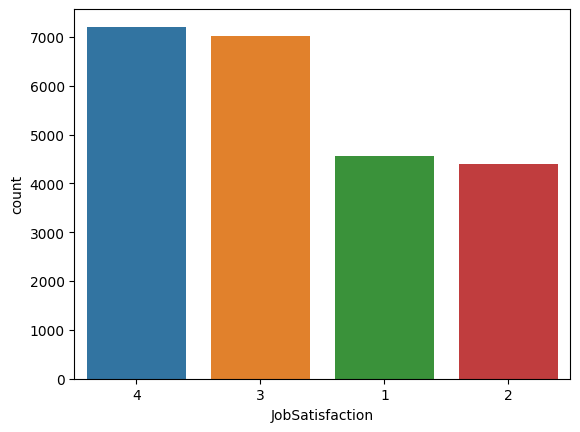

In [ ]:
sns.countplot(data=df, x='JobSatisfaction')
plt.show()

<Axes: xlabel='JobSatisfaction', ylabel='Attrition'>

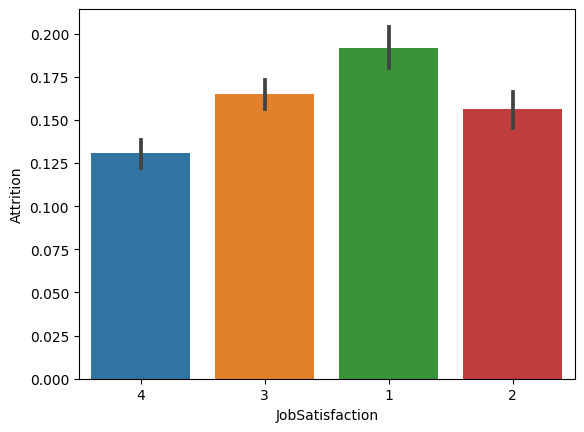

In [ ]:
df['Attrition'] = df['Attrition'].astype('category')
df['Attrition'] = df['Attrition'].cat.codes
sns.barplot(x='JobSatisfaction', y='Attrition', data=df)

# **Marital Status vs Attrition**

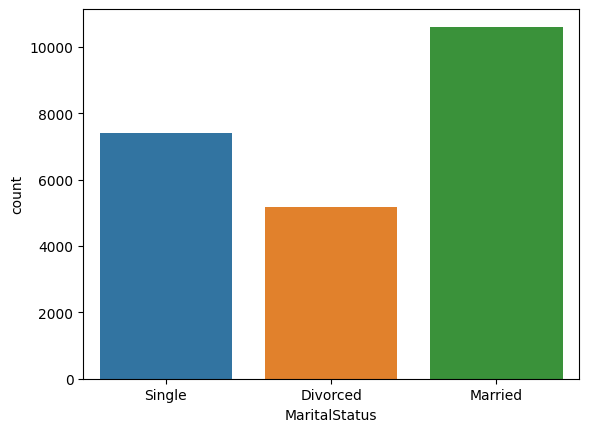

In [ ]:
sns.countplot(data=df, x='MaritalStatus')
plt.show()
#plt.xticks(rotation=90)

<Axes: xlabel='MaritalStatus', ylabel='Attrition'>

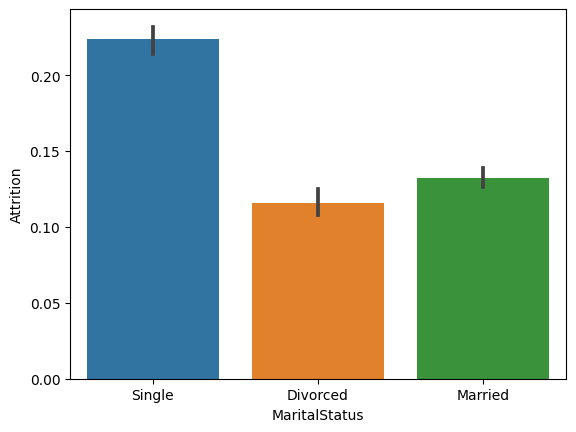

In [ ]:
df['Attrition'] = df['Attrition'].astype('category')
df['Attrition'] = df['Attrition'].cat.codes
sns.barplot(x='MaritalStatus', y='Attrition', data=df)

# Percent Salary Hike vs **Attrition**

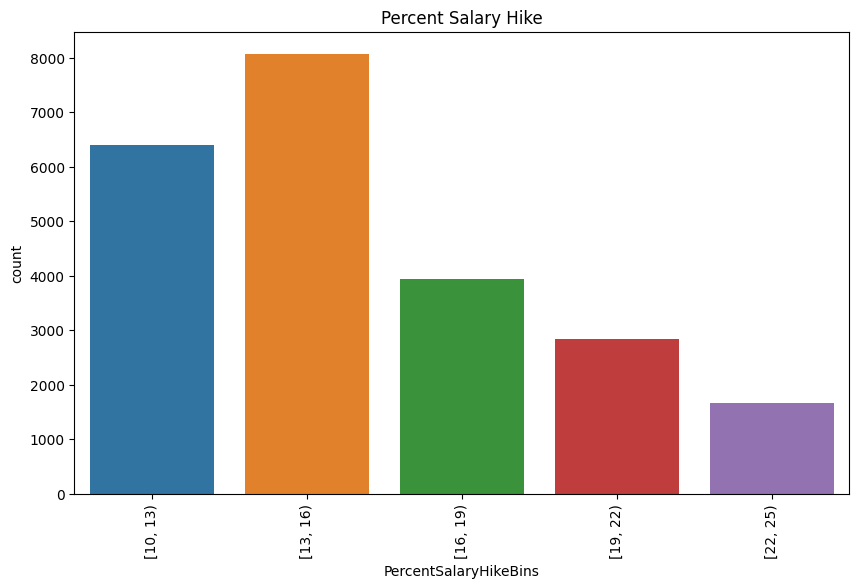

In [ ]:
df['PercentSalaryHike'] = pd.to_numeric(df['PercentSalaryHike'], errors='coerce')
bins = range(10, 26, 3)
df['PercentSalaryHikeBins']=pd.cut(df['PercentSalaryHike'], bins=bins, right=False)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='PercentSalaryHikeBins')
plt.xticks(rotation=90)
plt.title('Percent Salary Hike')
plt.show()

<Axes: xlabel='PercentSalaryHikeBins', ylabel='Attrition'>

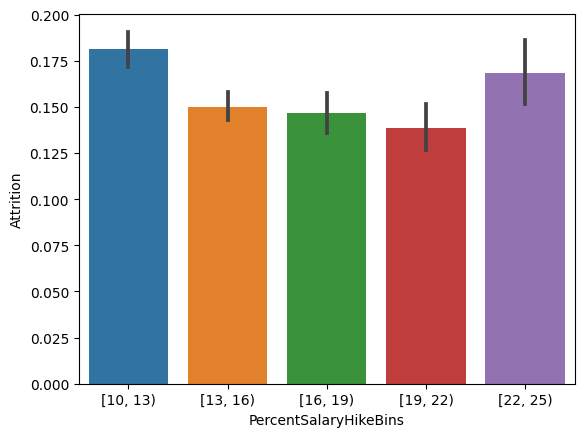

In [ ]:
df['Attrition'] = df['Attrition'].astype('category')
df['Attrition'] = df['Attrition'].cat.codes
sns.barplot(x='PercentSalaryHikeBins', y='Attrition', data=df)

# **Number of Companies worked vs Attrition**

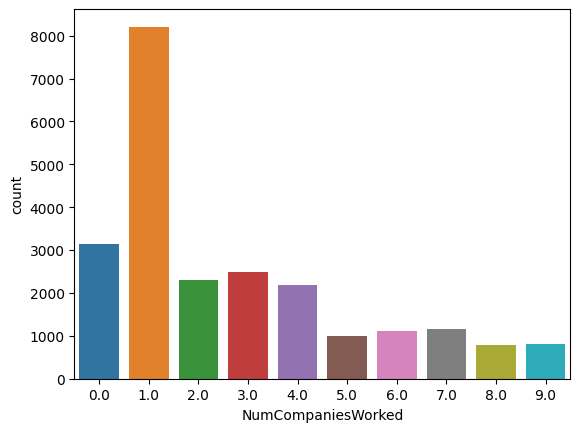

In [ ]:
sns.countplot(data=df, x='NumCompaniesWorked')
plt.show()
#plt.xticks(rotation=90)

<Axes: xlabel='NumCompaniesWorked', ylabel='Attrition'>

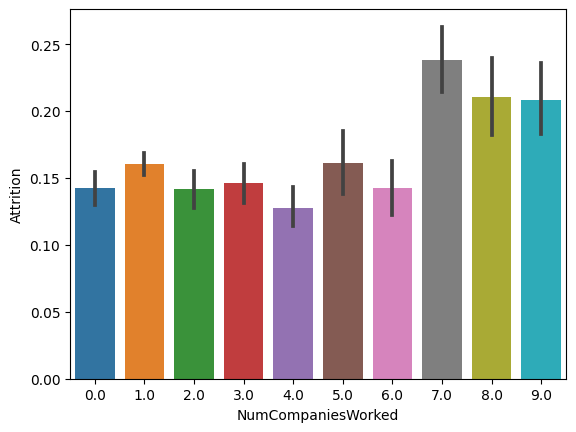

In [ ]:
df['Attrition'] = df['Attrition'].astype('category')
df['Attrition'] = df['Attrition'].cat.codes
sns.barplot(x='NumCompaniesWorked', y='Attrition', data=df)

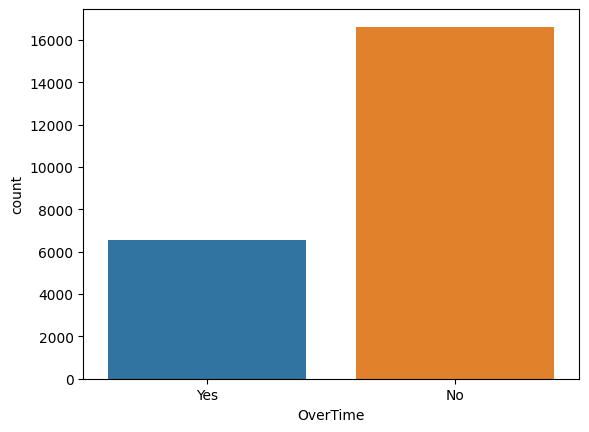

In [ ]:
sns.countplot(data=df, x='OverTime')
plt.show()
#plt.xticks(rotation=90)

<Axes: xlabel='OverTime', ylabel='Attrition'>

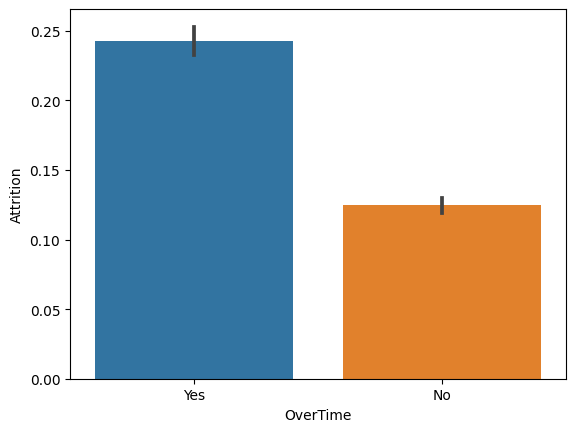

In [ ]:
df['Attrition'] = df['Attrition'].astype('category')
df['Attrition'] = df['Attrition'].cat.codes
sns.barplot(x='OverTime', y='Attrition', data=df)

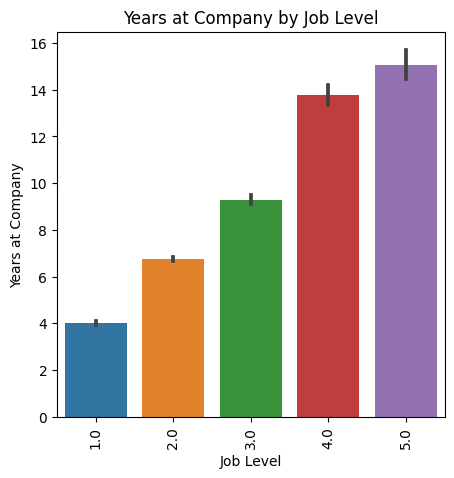

In [ ]:
plt.figure(figsize=(5,5))
sns.barplot(data=df, x='JobLevel', y='YearsAtCompany')
# Rotate the x-axis labels if needed
plt.xticks(rotation=90)
# Set labels and title
plt.xlabel('Job Level')
plt.ylabel('Years at Company')
plt.title('Years at Company by Job Level')
# Show the plot
plt.show()

<Figure size 2000x1800 with 0 Axes>

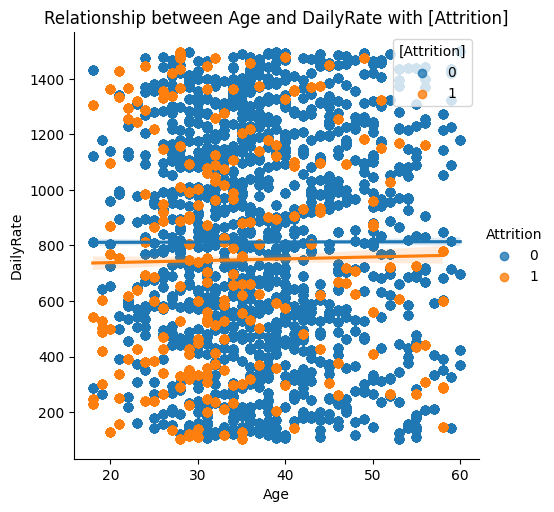

In [ ]:
filtered_df = df[df['Attrition'] == 'Voluntary Resignation']
plt.figure(figsize=(20, 18))
sns.lmplot(x='Age', y='DailyRate', hue='Attrition', data=df)
plt.title('Relationship between Age and DailyRate with [Attrition]')
plt.xlabel('Age')
plt.ylabel('DailyRate')
plt.legend(title='[Attrition]')
plt.show()

# **Clean the data by removing false labels**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23190 entries, 0 to 23432
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Age                       23190 non-null  float64 
 1   Attrition                 23190 non-null  int8    
 2   BusinessTravel            23190 non-null  object  
 3   DailyRate                 23190 non-null  float64 
 4   Department                23190 non-null  object  
 5   DistanceFromHome          23190 non-null  object  
 6   Education                 23190 non-null  float64 
 7   EducationField            23190 non-null  object  
 8   EnvironmentSatisfaction   23190 non-null  float64 
 9   HourlyRate                23190 non-null  object  
 10  JobInvolvement            23190 non-null  float64 
 11  JobLevel                  23190 non-null  float64 
 12  JobRole                   23190 non-null  object  
 13  JobSatisfaction           23190 non-null  obje

# **Categorical -> Numerical**

In [ ]:
def attrition(x):
    if x=='Voluntary Resignation':
        x=1
    else:
        x=0
    return x
df.Attrition=df.Attrition.apply(attrition)
df.Attrition = pd.to_numeric(df.Attrition,errors='coerce')
df.Attrition.value_counts()

0    19527
1     3663
Name: Attrition, dtype: int64

In [ ]:
df.EducationField.value_counts()

Life Sciences       9571
Medical             7296
Marketing           2524
Technical Degree    2053
Other               1304
Human Resources      441
Test                   1
Name: EducationField, dtype: int64

In [ ]:
#group test with other
def edufield(x):
    if  x=='Test':
        x='Other'
    return x
df.EducationField=df.EducationField.apply(edufield)

In [ ]:
#convert numerics in object to numeric data type
df.HourlyRate.value_counts()
df.HourlyRate = pd.to_numeric(df.HourlyRate,errors='coerce')
df.JobSatisfaction = pd.to_numeric(df.JobSatisfaction,errors='coerce')
df.MonthlyIncome = pd.to_numeric(df.MonthlyIncome,errors='coerce')
df.DistanceFromHome = pd.to_numeric(df.DistanceFromHome,errors='coerce')

In [ ]:
def overtime(x):
    if x=='Yes':
        x=1
    elif x=='No':
        x=0
    return x
df.OverTime=df.OverTime.apply(overtime)
df.OverTime = pd.to_numeric(df.OverTime,errors='coerce')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23190 entries, 0 to 23432
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       23190 non-null  float64
 1   Attrition                 23190 non-null  int64  
 2   BusinessTravel            23190 non-null  object 
 3   DailyRate                 23190 non-null  float64
 4   Department                23190 non-null  object 
 5   DistanceFromHome          23190 non-null  float64
 6   Education                 23190 non-null  float64
 7   EducationField            23190 non-null  object 
 8   EnvironmentSatisfaction   23190 non-null  float64
 9   HourlyRate                23190 non-null  int64  
 10  JobInvolvement            23190 non-null  float64
 11  JobLevel                  23190 non-null  float64
 12  JobRole                   23190 non-null  object 
 13  JobSatisfaction           23190 non-null  int64  
 14  Marita

In [ ]:
df.PercentSalaryHike.value_counts()
df.PercentSalaryHike = pd.to_numeric(df.PercentSalaryHike,errors='coerce')


In [ ]:
df['Employee Source'].value_counts()

Company Website    5355
Seek               3641
Indeed             2507
Jora               2397
LinkedIn           2314
Recruit.net        2306
GlassDoor          2157
Adzuna             2103
Referral            409
Test                  1
Name: Employee Source, dtype: int64

In [ ]:
def empsou(x):
    if x=='Test':
        x='Referral'
    return x
df['Employee Source']= df['Employee Source'].apply(empsou)

In [ ]:
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Initialize the LabelEncoder
label_encoder = LabelEncoder()
categorical_columns


['BusinessTravel',
 'Department',
 'EducationField',
 'JobRole',
 'MaritalStatus',
 'Employee Source']

In [ ]:
# Apply label encoding to each categorical column
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

# **Save cleaned file**

In [ ]:
df.to_csv('HR_Analyst_File.csv', index=False)

# **Test train split**

In [ ]:
y=df['Attrition']
X = df.drop(columns=['Attrition'])

In [ ]:
X.head()
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Attrition, dtype: int64

In [ ]:
y.value_counts()

0    19527
1     3663
Name: Attrition, dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.4, stratify=y, random_state=0)

# **Model training**

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,roc_auc_score,roc_curve
def model_eval(algo,xtrain,xtest,ytrain,ytest):
    algo.fit(xtrain,ytrain)
    y_train_pred=algo.predict(xtrain)
    y_train_prob=algo.predict_proba(xtrain)[:,1]

    y_test_pred=algo.predict(xtest)
    y_test_prob=algo.predict_proba(xtest)[:,1]
    print("MODEL USED FOR CLASSIFICATION :"+ algo)
    print('Confusion Matrix-Train:\n'+confusion_matrix(ytrain,y_train_pred))
    print('Accuracy Score-Train:\n'+accuracy_score(ytrain,y_train_pred))
    print('Classification Report-Train:\n'+classification_report(ytrain,y_train_pred))
    print('AUC Score-Train:\n'+roc_auc_score(ytrain,y_train_prob))
    print('\n')
    print('Confusion Matrix-Test:\n'+confusion_matrix(ytest,y_test_pred))
    print('Accuracy Score-Test:\n'+accuracy_score(ytest,y_test_pred))
    print('Classification Report-Test:\n'+classification_report(ytest,y_test_pred))
    print('AUC Score-Test:\n'+roc_auc_score(ytest,y_test_prob))
    print('\n')
    print('Plot')
    fpr,tpr,thresholds= roc_curve(ytest,y_test_prob)
    fig,ax1 = plt.subplots()
    ax1.plot(fpr,tpr)
    ax1.plot(fpr,fpr)
    ax1.set_xlabel('False Positive Rate')
    ax1.set_ylabel('True Positive Rate')
    ax2=ax1.twinx()
    ax2.plot(fpr,thresholds,'-g')
    ax2.set_ylabel('TRESHOLDS')
    plt.show()
    print('-x-x-x-x-x--x-x-x-x-x--x-x-x-x-x--x-x-x-x-x--x-x-x-x-x--x-x-x-x-x--x-x-x-x-x--x-x-x-x-x--x-x-x-x-x--x-x-x-x-x-')

In [ ]:
lr=LogisticRegression()
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
knn=KNeighborsClassifier()
rf=RandomForestClassifier()

dt=DecisionTreeClassifier()


models=[]
models.append(('MVLC',lr))
models.append(('RFC',rf))
models.append(('DT',dt))
models.append(('KNNC',knn))

results=[]
names=[]
ypred=[]
for name,model in models:
    model.fit(X_train,y_train)
    ypred= model.predict(X_test)
    print(name,'\n:')
    print(classification_report(y_test,ypred))
    kfold=KFold(shuffle=True,n_splits=5,random_state=0)
    cv_results=cross_val_score(model,X_train,y_train,cv=kfold,scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print("%s: %f (%f)"%(name,np.mean(cv_results)*100,np.var(cv_results,ddof=1)))
    print('-x-x-x-x-x--x-x-x-x-x--x-x-x-x-x--x-x-x-x-x--x-x-x-x-x--x-x-x-x-x--x-x-x-x-x--x-x-x-x-x--x-x-x-x-x--x-x-x-x-x-')


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


MVLC 
:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      7811
           1       1.00      0.00      0.00      1465

    accuracy                           0.84      9276
   macro avg       0.92      0.50      0.46      9276
weighted avg       0.87      0.84      0.77      9276



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

MVLC: 84.202942 (0.000030)
-x-x-x-x-x--x-x-x-x-x--x-x-x-x-x--x-x-x-x-x--x-x-x-x-x--x-x-x-x-x--x-x-x-x-x--x-x-x-x-x--x-x-x-x-x--x-x-x-x-x-
RFC 
:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7811
           1       1.00      0.98      0.99      1465

    accuracy                           1.00      9276
   macro avg       1.00      0.99      0.99      9276
weighted avg       1.00      1.00      1.00      9276

RFC: 99.345973 (0.000003)
-x-x-x-x-x--x-x-x-x-x--x-x-x-x-x--x-x-x-x-x--x-x-x-x-x--x-x-x-x-x--x-x-x-x-x--x-x-x-x-x--x-x-x-x-x--x-x-x-x-x-
DT 
:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      7811
           1       0.98      0.98      0.98      1465

    accuracy                           0.99      9276
   macro avg       0.99      0.99      0.99      9276
weighted avg       0.99      0.99      0.99      9276

DT: 98.821346 (0.000002)
-x-x-x-x-x--x-x-x-x-x--x-x-x-x-x-

# Plot the important features for models

DecisionTreeClassifier()


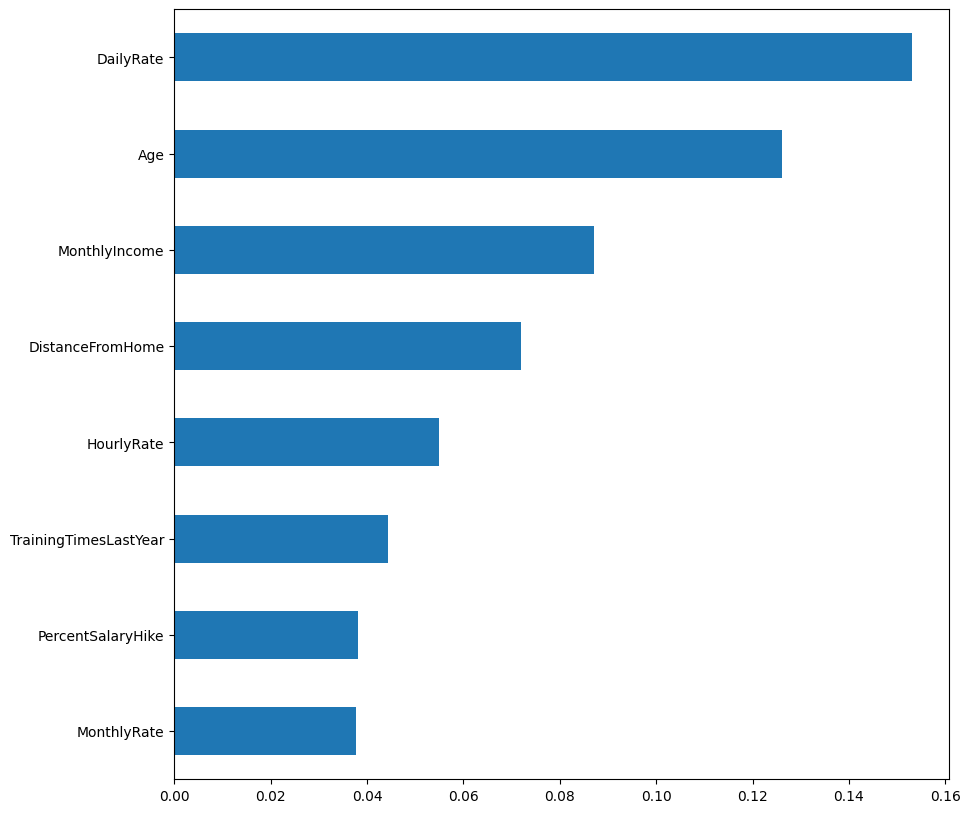

RandomForestClassifier()


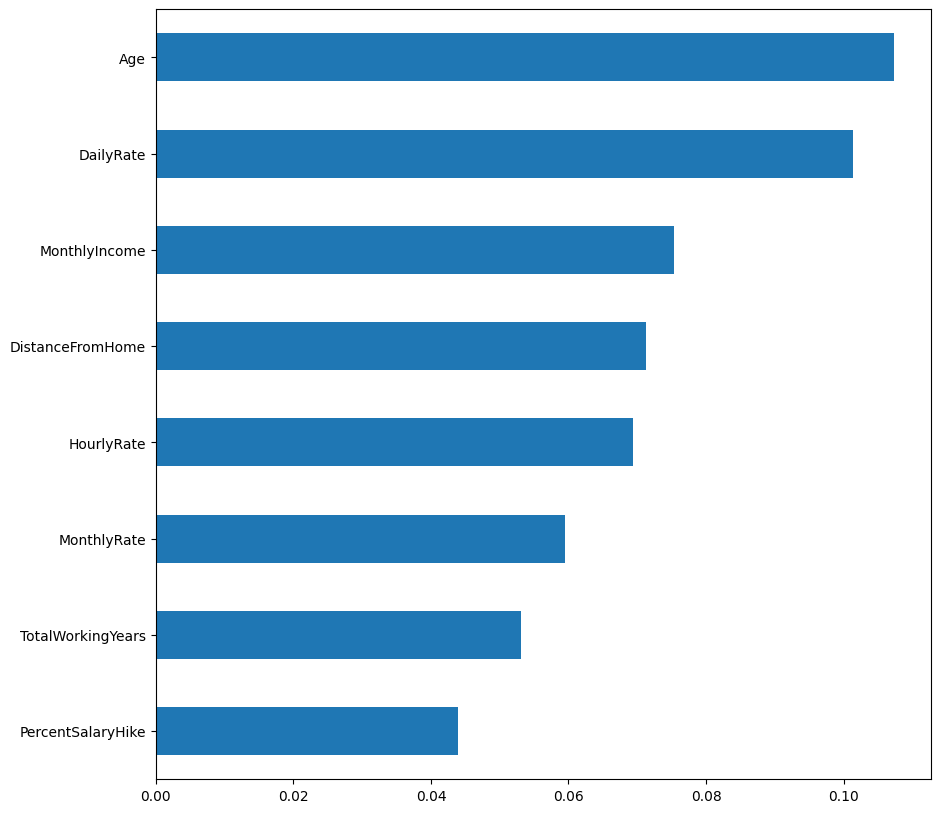

In [ ]:
#decision tree and random forest important features
models=[dt,rf]
for i in models:
    i.fit(X,y)
    i.feature_importances_
    print(i)
    #Plot the data:
    #my_colors = 'rgbkymc'  #red, green, blue, black, etc.
    feature_ranks = pd.Series(i.feature_importances_,index=X.columns)
    plt.figure(figsize =(10,10))
    feature_ranks.nlargest(8).sort_values(ascending=True).plot(kind='barh')

    plt.show()



In [ ]:
feature_names = df.columns.tolist()
# Get the coefficients (weights) of the features
feature_importance = abs(lr.coef_[0])

# Print feature importance scores
for i, feature_name in enumerate(feature_names):
    print(f"Feature: {feature_name}, Importance: {feature_importance[i]}")

Feature: Age, Importance: 0.046214935783061656
Feature: Attrition, Importance: 0.005231785163169242
Feature: BusinessTravel, Importance: 0.0003697491833888472
Feature: DailyRate, Importance: 0.0171159723884965
Feature: Department, Importance: 0.01700488465830048
Feature: DistanceFromHome, Importance: 0.006213639534847716
Feature: Education, Importance: 0.009768424683620184
Feature: EducationField, Importance: 0.027782506893183342
Feature: EnvironmentSatisfaction, Importance: 0.006603198878506254
Feature: HourlyRate, Importance: 0.020626187728962592
Feature: JobInvolvement, Importance: 0.003302011623857893
Feature: JobLevel, Importance: 0.031079915353608007
Feature: JobRole, Importance: 0.031855916460791375
Feature: JobSatisfaction, Importance: 0.04038774140488197
Feature: MaritalStatus, Importance: 1.1454355065614144e-05
Feature: MonthlyIncome, Importance: 9.177908625875905e-06
Feature: MonthlyRate, Importance: 0.049825429814670814
Feature: NumCompaniesWorked, Importance: 0.03344141081

IndexError: ignored

# **Find optimal alpha for decision tree**

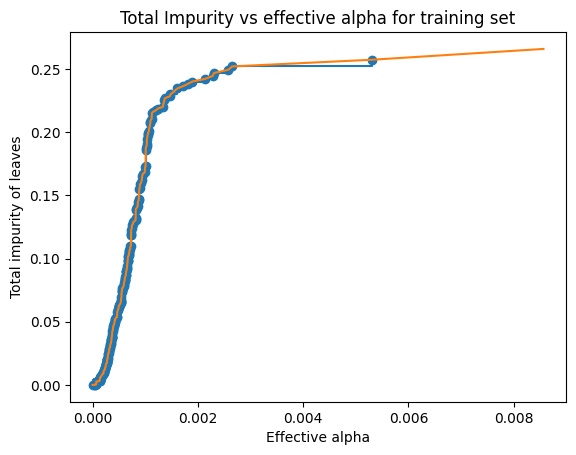

In [ ]:
# find optimal alpha for Decision tree
path = dt.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
#Using matplotlib.pyplot to plot the effect of varying ccp_alpha on error
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1],impurities[:-1],marker='o', drawstyle="steps-post")
#blue lines drowan to highlight step changes; orange is the graph
ax.set_xlabel("Effective alpha")
ax.set_ylabel("Total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.plot(ccp_alphas, impurities)

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

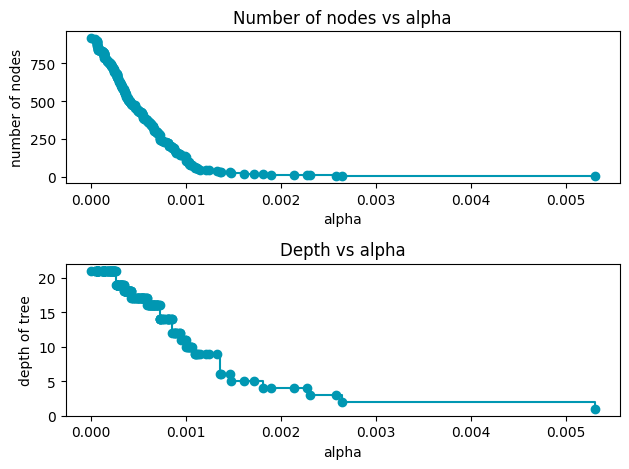

In [ ]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post", color = "#0097b2")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post",  color = "#0097b2")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()


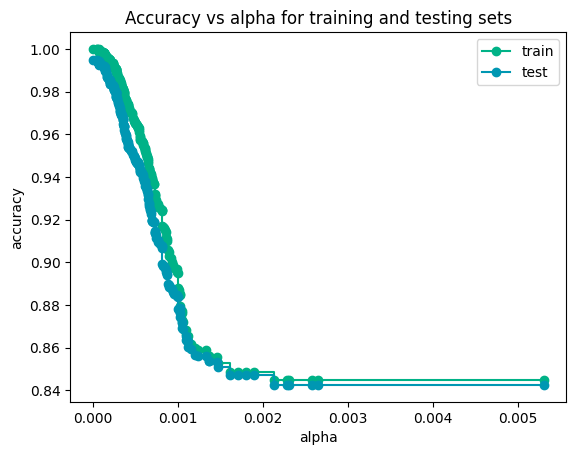

224


In [ ]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train", drawstyle="steps-post", color = "#00B287")
ax.plot(ccp_alphas, test_scores, marker="o", label="test", drawstyle="steps-post", color = "#0097b2")
ax.legend()
plt.show()

ccp_alpha_df = pd.DataFrame({"ccp_alpha":ccp_alphas, "test_accuracy":test_scores, "train_accuracy":train_scores, "max_depth":depth, "node_counts":node_counts})
ccp_alpha_df
diff= [a-b for a,b in zip(train_scores,test_scores)]
minimum=min(diff)
print(diff.index(minimum))
#Here both test and train accuracy goes in the same direction as each other. we shall use ccp_alpha as 0.003637

In [ ]:
ccp_alpha_df.iloc[[224]]

,ccp_alpha,test_accuracy,train_accuracy,max_depth,node_counts
224,0.001611,0.847132,0.848354,5,21


# **Final decision tree with optimal apha**

In [ ]:
#FINAL MODEL BUILDING
dt=DecisionTreeClassifier(criterion='gini',ccp_alpha=0.001611		)
dt.fit(X_train, y_train)
y_pred= dt.predict(X_test)
y_train_pred = dt.predict(X_train)
print(f'Model training with train data, fitting accuracy is : {(accuracy_score(y_train, y_train_pred))}')
print(f'Model accuracy score with test data : {(accuracy_score(y_test, y_pred))}')
confusion_matrix(y_pred, y_test)

Model training with train data, fitting accuracy is : 0.8528101193042978
Model accuracy score with test data : 0.8507977576541613


array([[7764, 1337],
       [  47,  128]])

# **Choose n for KNN**

Text(0.5, 1.0, 'K vs Accuracy in KNN')

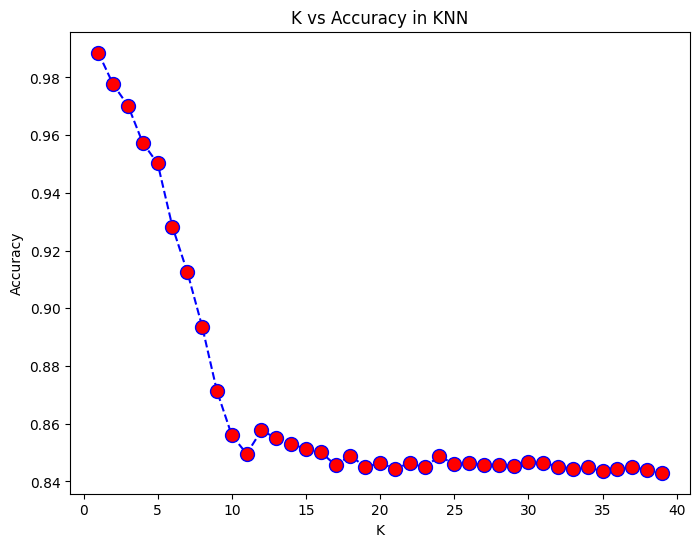

In [ ]:
param_grid = {'n_neighbors': [1, 3, 5, 7, 9, 11]}
accuracy=[]

for i in range(1,40):
  # Initialize the KNN classifier
  knn = KNeighborsClassifier(n_neighbors=i)
  knn.fit(X_train, y_train)
  y_pred_i= knn.predict(X_test)
  accuracy.append(accuracy_score(y_test, y_pred_i))

plt.figure(figsize=(8, 6))
plt.plot(range(1,40),accuracy, color='blue', linestyle="dashed", marker="o", markerfacecolor="red", markersize=10)
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.title('K vs Accuracy in KNN')


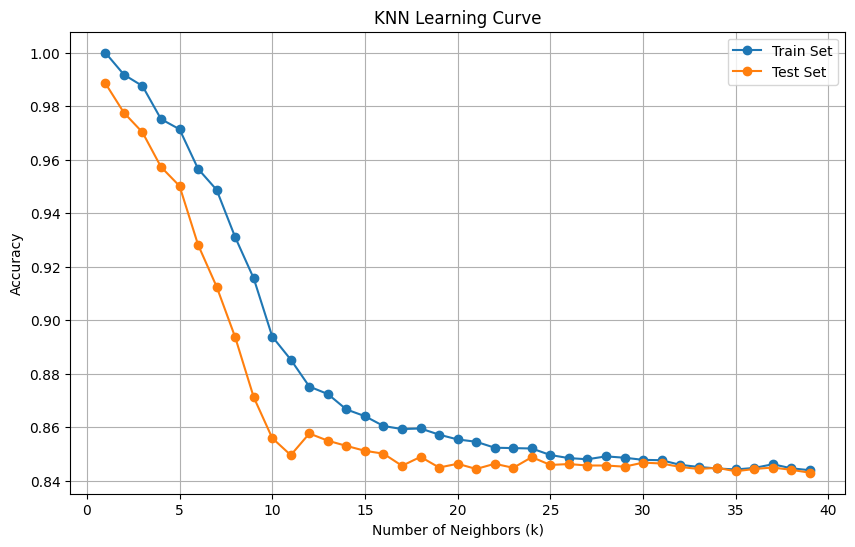

In [ ]:

# Define a range of values for k (number of neighbors)
k_values = np.arange(1, 40)  # You can adjust the range as needed

# Initialize lists to store accuracy scores for training and test sets
train_scores = []
test_scores = []

# Iterate over different values of k
for k in k_values:
    # Create and train a KNN classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)

    # Make predictions on the training and test sets
    y_train_pred = knn.predict(X_train)
    y_test_pred = knn.predict(X_test)

    # Calculate accuracy for the training and test sets
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Append the accuracy scores to the respective lists
    train_scores.append(train_accuracy)
    test_scores.append(test_accuracy)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_scores, marker='o', label='Train Set')
plt.plot(k_values, test_scores, marker='o', label='Test Set')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('KNN Learning Curve')
plt.legend()
plt.grid(True)
plt.show()

# **Final KNN Model**

In [ ]:
#FINAL MODEL BUILDING

knn = KNeighborsClassifier(n_neighbors=1)


# Train the KNN classifier on the training data
knn.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy with 11 neighbors: {accuracy:.2f}")
knn.n_neighbors


Accuracy with 11 neighbors: 0.99


1

# **Finetuning random forest**


Confusion Matrix-Train
 [[11716     0]
 [  530  1668]]
Accuracy Score-Train
 0.9619088687652724
Classification Report-Train
               precision    recall  f1-score   support

           0       0.96      1.00      0.98     11716
           1       1.00      0.76      0.86      2198

    accuracy                           0.96     13914
   macro avg       0.98      0.88      0.92     13914
weighted avg       0.96      0.96      0.96     13914

AUC Score-Train
 0.9991687172702084



Confusion Matrix-Test
 [[7810    1]
 [ 588  877]]
Accuracy Score-Test
 0.9365028029322984
Classification Report-Test
               precision    recall  f1-score   support

           0       0.93      1.00      0.96      7811
           1       1.00      0.60      0.75      1465

    accuracy                           0.94      9276
   macro avg       0.96      0.80      0.86      9276
weighted avg       0.94      0.94      0.93      9276

AUC Score-Test
 0.9947131528434345




Plot : AUC-ROC Curve


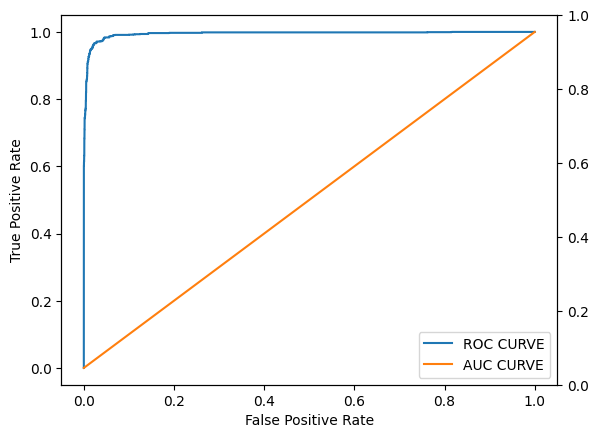

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
rfrs_cv=RandomForestClassifier(max_depth=20, min_samples_leaf=10, min_samples_split=20,
                       n_estimators=50)
rfrs_cv.fit(X_train,y_train)
y_train_pred=rfrs_cv.predict(X_train)
y_train_prob=rfrs_cv.predict_proba(X_train)[:,1]

y_test_pred=rfrs_cv.predict(X_test)
y_test_prob=rfrs_cv.predict_proba(X_test)[:,1]

print('Confusion Matrix-Train\n',confusion_matrix(y_train,y_train_pred))
print('Accuracy Score-Train\n',accuracy_score(y_train,y_train_pred))
print('Classification Report-Train\n',classification_report(y_train,y_train_pred))
print('AUC Score-Train\n',roc_auc_score(y_train,y_train_prob))
print('\n'*2)
print('Confusion Matrix-Test\n',confusion_matrix(y_test,y_test_pred))
print('Accuracy Score-Test\n',accuracy_score(y_test,y_test_pred))
print('Classification Report-Test\n',classification_report(y_test,y_test_pred))
print('AUC Score-Test\n',roc_auc_score(y_test,y_test_prob))
print('\n'*3)
print('Plot : AUC-ROC Curve')
fpr,tpr,thresholds= roc_curve(y_test,y_test_prob)
thresholds[0] = thresholds[0]-1
fig,ax1 = plt.subplots()
ax1.plot(fpr,tpr,label='ROC CURVE')
ax1.plot(fpr,fpr,label='AUC CURVE')
ax1.set_xlabel('False Positive Rate')
ax1.set_ylabel('True Positive Rate')
plt.legend(loc='best')
ax2=ax1.twinx()
plt.show()

# **Final Accuracy Check**

In [ ]:
lr=LogisticRegression()
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
knn=KNeighborsClassifier(n_neighbors=1)

rf=RandomForestClassifier(max_depth=20, min_samples_leaf=10, min_samples_split=20,
                       n_estimators=50)

dt=DecisionTreeClassifier(criterion='gini',ccp_alpha=0.001611)


models=[]
models.append(('MVLC',lr))
models.append(('RFC',rf))
models.append(('DT',dt))
models.append(('KNNC',knn))

results=[]
names=[]
ypred=[]
for name,model in models:
    model.fit(X_train,y_train)
    ypred= model.predict(X_test)
    print(name,'\n:')
    print(classification_report(y_test,ypred))
    kfold=KFold(shuffle=True,n_splits=5,random_state=0)
    cv_results=cross_val_score(model,X_train,y_train,cv=kfold,scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print("%s: %f (%f)"%(name,np.mean(cv_results)*100,np.var(cv_results,ddof=1)))
    print('Confusion Matrix-Test\n',confusion_matrix(y_test,ypred))
    print('-x-x-x-x-x--x-x-x-x-x--x-x-x-x-x--x-x-x-x-x--x-x-x-x-x--x-x-x-x-x--x-x-x-x-x--x-x-x-x-x--x-x-x-x-x--x-x-x-x-x-')


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


MVLC 
:
              precision    recall  f1-score   support

           0       0.84      1.00      0.91      7811
           1       1.00      0.00      0.00      1465

    accuracy                           0.84      9276
   macro avg       0.92      0.50      0.46      9276
weighted avg       0.87      0.84      0.77      9276



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

MVLC: 84.202942 (0.000030)
Confusion Matrix-Test
 [[7811    0]
 [1464    1]]
-x-x-x-x-x--x-x-x-x-x--x-x-x-x-x--x-x-x-x-x--x-x-x-x-x--x-x-x-x-x--x-x-x-x-x--x-x-x-x-x--x-x-x-x-x--x-x-x-x-x-
RFC 
:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      7811
           1       1.00      0.61      0.76      1465

    accuracy                           0.94      9276
   macro avg       0.96      0.80      0.86      9276
weighted avg       0.94      0.94      0.93      9276

RFC: 91.066522 (0.000062)
Confusion Matrix-Test
 [[7808    3]
 [ 573  892]]
-x-x-x-x-x--x-x-x-x-x--x-x-x-x-x--x-x-x-x-x--x-x-x-x-x--x-x-x-x-x--x-x-x-x-x--x-x-x-x-x--x-x-x-x-x--x-x-x-x-x-
DT 
:
              precision    recall  f1-score   support

           0       0.85      0.99      0.92      7811
           1       0.73      0.09      0.16      1465

    accuracy                           0.85      9276
   macro avg       0.79      0.54      0.54      9276
weighted avg 